In [56]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import erf
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
from scipy.interpolate import UnivariateSpline as InterpolateSpline
from scipy.interpolate import splrep, splev
from scipy.interpolate import make_interp_spline as make_spline
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import fsolve

from mpl_toolkits.axes_grid1 import make_axes_locatable

# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


config_disorder = 0
scaled_disorder = 0

if config_disorder:
    base_dir = "../results_conf_dis/"
else:
    base_dir = "../results/"

print(base_dir[2:])
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

/Users/rafal.swietek/Projects/CODES/QHamSolver/QuantumSun/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


In [57]:
def envelope_sp(s, sc):
    return -(1-s) / s * np.log( (1-s) / ( 1-sc) )

def envelope_erg(s, c):
    return -(1-s) / s * np.log( (1-s) / c )

def envelope_ansatz(x, A, B):
    return -(1 - x) * np.log( (1 - x) / B) + np.log(x) - A * x * np.log(x)

def envelope_rmt(s):
    return envelope_sp(s, sc=1-1/np.log(2))
    # return (1-s) / s * (1 + (1-s)*3*np.log(2)) * np.log( (1 + (1-s)*3*np.log(2))/(1-s)/np.log(2) )

def critical_exponent_guess(_sc, _c):
    return -np.log(_sc) / (np.log( (1-_sc)/_c ) * (-1+_sc-np.log(_sc)) + np.log(_sc) * (-_sc + np.log(_sc)) )

## CARTOON

[0.14926752]
0.14926752459870973 0.5754328128775198


Text(0.03, 1.35, '$\\beta(s)$')

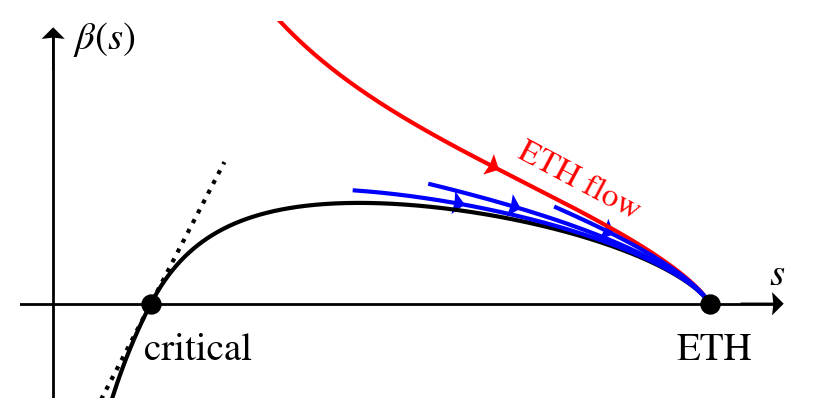

In [329]:
colors_ls_cyc = itertools.cycle(colors_ls)
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,2.5), dpi = 200)


# axis[0].plot(z, ansatz(z, 1e6), label=r"$b=\infty$")
colors_ls_cyc = itertools.cycle(colors_ls)



# MAIN CURVES

# pars2 = [4.092695889007306, 0.28438454954494563]
pars2 = [5, 1.5]

r = tools.RootFinder(0, 1, 0.001)
roots = r.find(envelope_ansatz, *pars2)
Sc = roots[0]
print(roots)
s1min = 0.15 * Sc
s = np.linspace(s1min, 1, 1000)
fulldata = envelope_ansatz(s, *pars2)
nu = critical_exponent_guess(Sc, pars2[1])

print(Sc, nu)

# inset = axis.inset_axes([0.34, 0.03, 0.62, 0.5]);  
xin1, xin2, yin1, yin2 = 0.7*Sc, 1.75 * Sc, envelope_ansatz(0.7*Sc, *pars2), envelope_ansatz(1.75*Sc, *pars2)


s = np.linspace(0, xin2, 1000)
axis.plot(s, (s - Sc) / Sc,      color='k',   ls=':')

def plot_curves(ax):
    s = np.linspace(s1min, 1, 1000)
    fulldata = envelope_ansatz(s, *pars2)
    # ax.plot(s, fulldata, color='red', ls='--', zorder=1)

    s = np.linspace(Sc, 1, 10000)
    ax.plot(s, envelope_sp(s, sc=Sc), color='k', zorder=2)

    s = np.linspace(0.7*s1min, Sc, 10000)
    ax.plot(s, np.log(s / Sc), color='k', ls='-', zorder=2)
    
    ax.scatter([Sc, 1], [0,0], marker='o', s=40, color='k', zorder=3)

plot_curves(axis)

s = np.linspace(0.3, 1, 10000)
# axis.plot(s, envelope_erg(s, c=1/np.log(2)), ls='--', color='red')

y = envelope_rmt(s)
axis.plot(s, y, ls='-', color='red')
i1 = s.size // 2
u = s[i1+1] - s[i1]
v = y[i1+1] - y[i1]
pos_x = s[i1] + u/2
pos_y = y[i1] + v/2
norm = np.sqrt(u**2+v**2)

axis.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=-1, pivot="mid", linewidth=0, width=0.003, headwidth=10, color='red', lw=0)


# TRAJECTORIES
def plot_tajectory(c, mu = 0.3):
    
    midpoint = (1+Sc) / (2 + mu)
    s = np.linspace(midpoint, 1, 10000)
    y = envelope_erg(s, c = c)
    axis.plot(s, y, color='b', ls='-')
    
    # s = np.linspace((1+3*Sc)/4, midpoint, 10000)
    # y = envelope_erg(s, c = c) * ( np.exp(-(s - (midpoint - mu))**2 / sig**2 ) - 1) + envelope_erg(midpoint, c = c) * ( np.exp(-(s + mu)**2 / sig**2 ) - 1)
    # axis.plot(s, y, color='green', ls=':')
    
    # axis.scatter(s[0], y[0], color='b', s=30)
    
    i1 = s.size // 4
    u = s[i1+1] - s[i1]
    v = y[i1+1] - y[i1]
    pos_x = s[i1] + u/2
    pos_y = y[i1] + v/2
    norm = np.sqrt(u**2+v**2)

    axis.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=-1, pivot="mid", linewidth=0, width=0.003, headwidth=10, color='b', lw=0)
    
    # axis.annotate(r"$(L_{%d},s_{%d})$"%(idx, idx), fontsize=10, xy=(s[0] + 0.01, y[0] - shift), xycoords='data', color='b')
    
plot_tajectory(c = 1/np.log(2)-0.2, mu=-0.5)
plot_tajectory(c = 1              , mu=0.0)
plot_tajectory(c = 0.9            , mu=0.5)


fig_help.set_plot_elements(axis, ylabel=r"", xlabel=r"", font_size=14, set_legend=0, xscale='linear', yscale='linear')

# CHANGE TICK PARAMS AND PLOT FRAME
axis.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, labeltop=0)
axis.set_yticks([])
axis.set_yticklabels([])
axis.tick_params(axis='x', which='both', bottom=0, top=False, labelbottom=0)

axis.axvline(x=0, ls='-', c='k', lw=1, ymax=0.968)
axis.axhline(y=0, ls='-', c='k', lw=1, xmax=0.98)

axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.spines['left'].set_visible(False)

# axis.arrow(0, 1.05*max(fulldata), 0.0, 0.02, shape='full', lw=0, length_includes_head=0, head_width=.025, color='k')
# axis.arrow(1.04, 0, 0.003, 0, shape='full', lw=0, length_includes_head=0, head_width=.025, color='k')

axis.quiver(0.0005, 1.35, 0.0, 0.01,   angles="xy", zorder=-1, pivot="mid", linewidth=0, width=0.003, headwidth=10, color='k')
axis.quiver(1.08, -0.0005, 0.01, 0, angles="xy", zorder=-1, pivot="mid", linewidth=0, width=0.003, headwidth=10, color='k')

axis.set_xlim(-0.05, 1.13)
axis.set_ylim(-0.5, 1.5)

axis.annotate(r"ETH flow", fontsize=12, xy=(0.7, 0.45), xycoords='data', color='red', rotation=-28)

axis.annotate(r"ETH", fontsize=14, xy=(0.95, -0.3), xycoords='data')
axis.annotate(r"critical", fontsize=14, xy=(Sc-0.01, -0.3), xycoords='data')
axis.annotate(r"$s$", fontsize=14, xy=(1.09, 0.1), xycoords='data')
axis.annotate(r"$\beta(s)$", fontsize=14, xy=(.03, 1.35), xycoords='data')

# fig.savefig("plots_beta_final/Fig1.pdf", bbox_inches = 'tight', pad_inches=0.02)

## FIGURE 2

No handles with labels found to put in legend.


[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]
J= 3   alfa= 0.65   eta= -0.1525833463469681   c= 0.08713796058984408
J= 3   alfa= 0.66   eta= -0.14694778444810822   c= 0.07816251687633141
J= 3   alfa= 0.67   eta= -0.13201410070911399   c= 0.07545889089880249
J= 3   alfa= 0.68   eta= -0.11142335833089738   c= 0.07564715001625778
J= 3   alfa= 0.69   eta= -0.08442904139412358   c= 0.07958261844231033
J= 3   alfa= 0.7   eta= -0.057674492868410775   c= 0.0828392414660434
J= 3   alfa= 0.71   eta= -0.02216390708170195   c= 0.09285182345741178


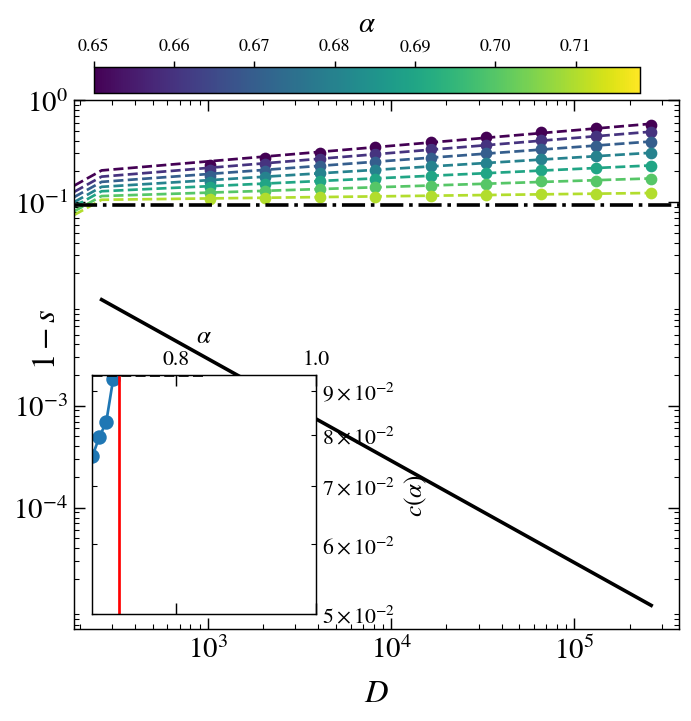

In [102]:
L_total=15
J=3
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,5), dpi = 130)

inset = axis.inset_axes([0.03, 0.03, 0.37, 0.45])

interpolate = 0
use_fit = 1
bin_size = 10
use_area_collapse = 1
dalfa = 0.04

def entropy_fit(D, c, eta):
    return c * D**(-eta)

p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

sizes = np.arange(10, 19, 1 if p > 0 else 2)

alfa_crit = 0.75
s1_crit = 1
s1_crit = 1

if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]

if J == 0.1:    alfa_crit = 0.8838011380886784; s1_crit = 0.11432584064242023; sizes = np.arange(10, 15, Lstep); nu = 0.66573; s1_min = 0.2; 
elif J == 0.2:  alfa_crit = 0.8088393000000000; s1_crit = 0.19575772032771582; sizes = np.arange(10, 16, Lstep); nu = 0.63364; s1_min = 0.4; 
elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.27426435352423423; sizes = np.arange(10, 16, Lstep); nu = 0.61334; s1_min = 0.5; 
elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.3975596423927653; s1_min = 0.60; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.61; L0 = 4
elif J == 1:    alfa_crit = 0.7314402852322444; s1_crit = 0.5976612536491842; s1_min = 0.83; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.68; L0 = 3
elif J == 2:    alfa_crit = 0.7207704442893257; s1_crit = 0.8326330851556897; s1_min = 0.96; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.79; L0 = 2
elif J == 3:    alfa_crit = 0.71795404;         s1_crit = 0.9063184653468818; s1_min = 0.98; sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.80; L0 = 3
else:           alfa_crit = 1/np.sqrt(2)


alfa_min = alfa_crit + 0.0
alfa_max = 0.99

interaction = []
ydata = []
for L_total in sizes:
    sub_sizes = np.arange(0, L_total+1)
    L = L_total - N
    LA = L_total - p if p > 0 else L_total // 2

    name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            alfa_vals    = np.array(file.get('interaction'))
            gap_ratio    = np.array(file.get('gap_ratio'))
            entropy      = np.array(file.get('entropy'))
            entropy_site = np.array(file.get('single_site_entropy'))
    else:
        print(name_out)
    entropy = entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA)
    interaction.append(alfa_vals)
    ydata.append(entropy)

# alfa_min = alfa_crit - 0.06

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = matplotlib.colors.Normalize(
    vmin=max(alfa_min, np.min(alfa_vals)),
    vmax=min(alfa_max, np.max(alfa_vals))
    )


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

ydata = np.transpose( np.array(ydata) )

idx_c = 0

envelope_ydata = []
envelope_xdata = []
yax_max = -10
yax_min = 10
prefactor = []
alfa_plot = []
for ii_a, alfa in enumerate(alfa_vals):
    if alfa < alfa_min or alfa > alfa_max: continue
    if alfa == alfa_crit: idx_c = ii_a
    # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
    col = s_m.to_rgba(alfa)

    xx = 2**sizes# - N - L0
    yy = ydata[ii_a]
    axis.scatter(xx, 1 - yy, marker='o', s=30, color=s_m.to_rgba(alfa))
    
    try:
        ii_cut = -10 if interpolate else -6
        ii_cut = -8
        pars, pconv= fit(entropy_fit,
                        xdata = xx[ii_cut:],
                        ydata = 1 - yy[ii_cut:])

        eta = pars[1]
        c = pars[0]
        print("J=", J, "  alfa=", np.round(alfa, 2), "  eta=", eta, "  c=", c)
        prefactor.append(c)
        alfa_plot.append(alfa)
        dense_sizes = np.linspace(0, xx[-1], 1000)
        # dense_sizes = np.linspace(-0.5, 16.5, 1000)
        axis.plot(dense_sizes, entropy_fit(dense_sizes, *pars), lw=1.5, color=s_m.to_rgba(alfa), ls = '--')
    except RuntimeError:
        print(alfa)

alfa_plot = np.array(alfa_plot)
prefactor = np.array(prefactor)

# dense_sizes = np.linspace(-0.5, 16.5, 1000)

axis.axhline(y=1 - s1_crit, ls='-.', c='k', lw=2)
# s_rmt = 2/np.log(2) / 2**(dense_sizes + N)
s_rmt = 2/np.log(2) / (dense_sizes)
axis.plot(dense_sizes, s_rmt, ls='-', c='k', lw=2)

# s_rmt2 = 2/np.log(2) / 2**(dense_sizes + N)
# axis.plot(dense_sizes, s_rmt2, ls=':', c='r', lw=2)


inset.plot((alfa_plot), (prefactor), marker='o', markersize=7)

cbar = None

# fig.subplots_adjust(right=0.94)
# cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
# # fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
# cbar.set_label(r"$\alpha$", fontsize=16)
# cbar.ax.tick_params(labelsize=15)
fig.subplots_adjust(top=0.94)
cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.04])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
cbar.set_label(r"$\alpha$", fontsize=16)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')


fig_help.set_plot_elements(axis, ylabel=r"$1-s$", xlabel=r"$D$", font_size=16, set_legend=False, xscale='log', yscale='log')
# axis.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])

axis.yaxis.set_label_coords(-0.02, 0.55)
axis.set_yticks([1e-4, 1e-3, 1e-1, 1e0])

# axis.set_ylim(np.min(s_rmt2), np.max(s_rmt))
# axis.set_xlim(-0.5, 13.5)

inset.set_xlim(0.68, 1)
inset.set_ylim(0.05, None)
inset.axhline(y=2/np.log(2), ls=':', color='k', xmin=0.5)
inset.axhline(y=1-s1_crit, ls='--', color='k', xmax=0.5)
inset.axvline(x=alfa_crit, ls='-', color='r')
inset.annotate(r"${\alpha}_c$", color='r', fontsize=12, xy=(alfa_crit-0.01, 1.1), xycoords='data', backgroundcolor="w")

# inset.set_ylim(0.251, 0.9)

inset.xaxis.set_label_position("top")
# inset.xaxis.set_label_coords(.5, 1.2)
inset.xaxis.tick_top()
inset.yaxis.set_label_position("right")
# inset.yaxis.set_label_coords(.5, 1.2)
inset.yaxis.tick_right()
fig_help.set_plot_elements(inset, ylabel=r"${c(\alpha)}$", xlabel=r"$\alpha$", font_size=12, set_legend=False, xscale='linear', yscale='log')
fig_help.set_legend(inset, loc = 'upper left', fontsize=10)

# inset.set_xticks([0.7, 0.8, 0.9, 1])
# inset.set_yticks([0.75, 1.0, 1.25, 1/np.log(2), 1-s1_crit])
# inset.set_yticklabels(["0.75", "1", "1.25", r"$1/\ln{2}$", r"$1-s_c$"])

# inset.set_yticks([0.3, 0.4, 0.5, 0.6, 0.8])
# inset.set_yticklabels(['0.3', '0.4', '0.5', '0.6', '0.8'])

fig.subplots_adjust(wspace = 0.18, hspace=0.13)
fig.savefig("plots_beta_final/Fig2.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

No handles with labels found to put in legend.


[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]
J= 2   alfa= 0.73   eta= 33.989929018020646   L0= 2.8952406714553502
J= 2   alfa= 0.74   eta= 18.218483785559144   L0= 2.4587711269649892
J= 2   alfa= 0.75   eta= 12.25767394071635   L0= 2.3743429292255995
J= 2   alfa= 0.76   eta= 9.129683902193378   L0= 2.412779379391962
J= 2   alfa= 0.77   eta= 7.249187989245734   L0= 2.4565165492773455
J= 2   alfa= 0.78   eta= 6.089198015857663   L0= 2.391656565168733
J= 2   alfa= 0.79   eta= 5.206693879274364   L0= 2.409311442495087
J= 2   alfa= 0.8   eta= 4.545144848956486   L0= 2.4400385486417764
J= 2   alfa= 0.81   eta= 4.061505003202752   L0= 2.4053082647356545
J= 2   alfa= 0.82   eta= 3.637180453047392   L0= 2.4786934237498848
J= 2   alfa= 0.83   eta= 3.318225014674572   L0= 2.4799542882758843
J= 2   alfa= 0.84   eta= 3.05057460753618   L0= 2.500470241162694
J= 2   alfa= 0.85   eta= 2.8018633

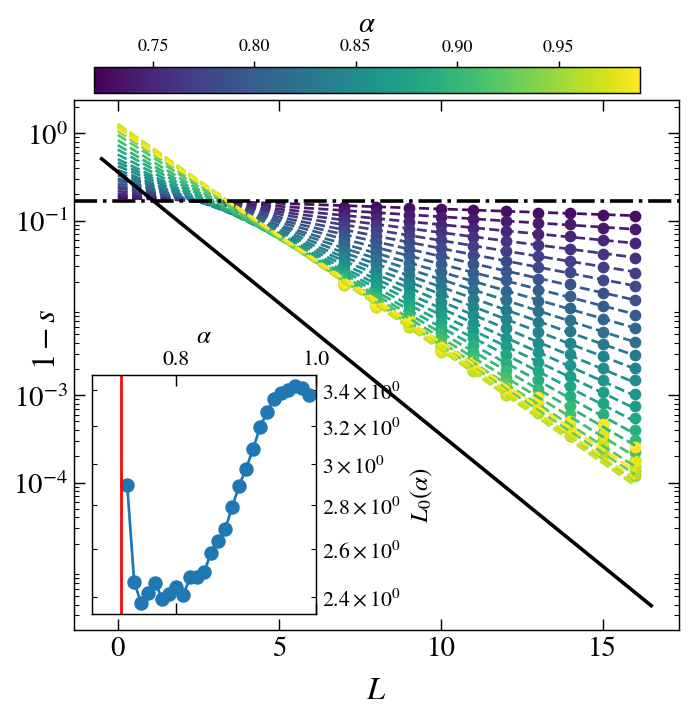

In [105]:
L_total=15
J=2
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,5), dpi = 130)

inset = axis.inset_axes([0.03, 0.03, 0.37, 0.45])

interpolate = 0
use_fit = 1
bin_size = 10
use_area_collapse = 1
dalfa = 0.04

p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

sizes = np.arange(10, 19, 1 if p > 0 else 2)

alfa_crit = 0.75
s1_crit = 1
s1_crit = 1

if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]

if J == 0.1:    alfa_crit = 0.8838011380886784; s1_crit = 0.11432584064242023; sizes = np.arange(10, 15, Lstep); nu = 0.66573; s1_min = 0.2; 
elif J == 0.2:  alfa_crit = 0.8088393000000000; s1_crit = 0.19575772032771582; sizes = np.arange(10, 16, Lstep); nu = 0.63364; s1_min = 0.4; 
elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.27426435352423423; sizes = np.arange(10, 16, Lstep); nu = 0.61334; s1_min = 0.5; 
elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.3975596423927653; s1_min = 0.60; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.61; L0 = 4
elif J == 1:    alfa_crit = 0.7314402852322444; s1_crit = 0.5976612536491842; s1_min = 0.83; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.68; L0 = 3
elif J == 2:    alfa_crit = 0.7207704442893257; s1_crit = 0.8326330851556897; s1_min = 0.96; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.79; L0 = 2
elif J == 3:    alfa_crit = 0.71795404;         s1_crit = 0.9063184653468818; s1_min = 0.98; sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.80; L0 = 3
else:           alfa_crit = 1/np.sqrt(2)


def entropy_fit(L, L0, eta):
    return (1-s1_crit) * np.exp(-(L - L0) / eta)

alfa_min = alfa_crit + 0.0
alfa_max = 0.99

interaction = []
ydata = []
for L_total in sizes:
    sub_sizes = np.arange(0, L_total+1)
    L = L_total - N
    LA = L_total - p if p > 0 else L_total // 2

    name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            alfa_vals    = np.array(file.get('interaction'))
            gap_ratio    = np.array(file.get('gap_ratio'))
            entropy      = np.array(file.get('entropy'))
            entropy_site = np.array(file.get('single_site_entropy'))
    else:
        print(name_out)
    entropy = entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA)
    interaction.append(alfa_vals)
    ydata.append(entropy)

# alfa_min = alfa_crit - 0.06

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = matplotlib.colors.Normalize(
    vmin=max(alfa_min, np.min(alfa_vals)),
    vmax=min(alfa_max, np.max(alfa_vals))
    )


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

ydata = np.transpose( np.array(ydata) )

idx_c = 0

envelope_ydata = []
envelope_xdata = []
yax_max = -10
yax_min = 10
L0s = []
alfa_plot = []
for ii_a, alfa in enumerate(alfa_vals):
    if alfa < alfa_min or alfa > alfa_max: continue
    if alfa == alfa_crit: idx_c = ii_a
    # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
    col = s_m.to_rgba(alfa)

    xx = sizes - N
    yy = ydata[ii_a]
    axis.scatter(xx, 1 - yy, marker='o', s=30, color=s_m.to_rgba(alfa))
    
    try:
        ii_cut = -10 if interpolate else -6
        ii_cut = -8
        pars, pconv= fit(entropy_fit,
                        xdata = xx[ii_cut:],
                        ydata = 1 - yy[ii_cut:])

        eta = pars[1]
        L0 = pars[0]
        print("J=", J, "  alfa=", np.round(alfa, 2), "  eta=", eta, "  L0=", L0)
        L0s.append(L0)
        alfa_plot.append(alfa)
        dense_sizes = np.linspace(0, xx[-1], 1000)
        # dense_sizes = np.linspace(-0.5, 16.5, 1000)
        axis.plot(dense_sizes, entropy_fit(dense_sizes, *pars), lw=1.5, color=s_m.to_rgba(alfa), ls = '--')
    except RuntimeError:
        print(alfa)

alfa_plot = np.array(alfa_plot)
prefactor = np.array(prefactor)

dense_sizes = np.linspace(-0.5, 16.5, 1000)

axis.axhline(y=1 - s1_crit, ls='-.', c='k', lw=2)
# s_rmt = 2/np.log(2) / 2**(dense_sizes + N)
s_rmt = 2/np.log(2) / 2**(dense_sizes + N)
axis.plot(dense_sizes, s_rmt, ls='-', c='k', lw=2)

# s_rmt2 = 2/np.log(2) / 2**(dense_sizes + N)
# axis.plot(dense_sizes, s_rmt2, ls=':', c='r', lw=2)


inset.plot((alfa_plot), (L0s), marker='o', markersize=7)

cbar = None

# fig.subplots_adjust(right=0.94)
# cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
# # fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
# cbar.set_label(r"$\alpha$", fontsize=16)
# cbar.ax.tick_params(labelsize=15)
fig.subplots_adjust(top=0.94)
cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.04])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
cbar.set_label(r"$\alpha$", fontsize=16)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')


fig_help.set_plot_elements(axis, ylabel=r"$1-s$", xlabel=r"$L$", font_size=16, set_legend=False, xscale='linear', yscale='log')
# axis.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])

axis.yaxis.set_label_coords(-0.02, 0.55)
axis.set_yticks([1e-4, 1e-3, 1e-1, 1e0])

# axis.set_ylim(np.min(s_rmt2), np.max(s_rmt))
# axis.set_xlim(-0.5, 13.5)

inset.set_xlim(0.68, 1)
# inset.set_ylim(0.05, None)
# inset.axhline(y=2/np.log(2), ls=':', color='k', xmin=0.5)
# inset.axhline(y=1-s1_crit, ls='--', color='k', xmax=0.5)
inset.axvline(x=alfa_crit, ls='-', color='r')
inset.annotate(r"${\alpha}_c$", color='r', fontsize=12, xy=(alfa_crit-0.01, 1.1), xycoords='data', backgroundcolor="w")

# inset.set_ylim(0.251, 0.9)

inset.xaxis.set_label_position("top")
# inset.xaxis.set_label_coords(.5, 1.2)
inset.xaxis.tick_top()
inset.yaxis.set_label_position("right")
# inset.yaxis.set_label_coords(.5, 1.2)
inset.yaxis.tick_right()
fig_help.set_plot_elements(inset, ylabel=r"${L_0(\alpha)}$", xlabel=r"$\alpha$", font_size=12, set_legend=False, xscale='linear', yscale='log')
fig_help.set_legend(inset, loc = 'upper left', fontsize=10)

# inset.set_xticks([0.7, 0.8, 0.9, 1])
# inset.set_yticks([0.75, 1.0, 1.25, 1/np.log(2), 1-s1_crit])
# inset.set_yticklabels(["0.75", "1", "1.25", r"$1/\ln{2}$", r"$1-s_c$"])

# inset.set_yticks([0.3, 0.4, 0.5, 0.6, 0.8])
# inset.set_yticklabels(['0.3', '0.4', '0.5', '0.6', '0.8'])

fig.subplots_adjust(wspace = 0.18, hspace=0.13)
# fig.savefig("plots_beta_final/Fig2.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

No handles with labels found to put in legend.


[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]
J= 0.5   alfa= 0.77   eta= 124.92737834303232   c= 0.6557443815885585
J= 0.5   alfa= 0.79   eta= 17.682813365190515   c= 0.9032333622086612
J= 0.5   alfa= 0.81   eta= 7.692533737258492   c= 1.5305264512216896
J= 0.5   alfa= 0.83   eta= 4.703183811996537   c= 2.686521037321963
J= 0.5   alfa= 0.85   eta= 3.3706660502828263   c= 4.528854727050458
J= 0.5   alfa= 0.87   eta= 2.6654516390253313   c= 6.94288665634828
J= 0.5   alfa= 0.89   eta= 2.2341736490050264   c= 9.750934027838444
J= 0.5   alfa= 0.91   eta= 1.9512657895845062   c= 12.559999213982524
J= 0.5   alfa= 0.93   eta= 1.7510230476281377   c= 15.166645708496295
J= 0.5   alfa= 0.95   eta= 1.62698400937319   c= 15.790373005269805
J= 0.5   alfa= 0.97   eta= 1.5179144936827653   c= 16.964045627851412
J= 0.5   alfa= 0.99   eta= 1.4415337175365248   c= 16.90652848781519
J= 1   alfa= 0.7

No handles with labels found to put in legend.
No handles with labels found to put in legend.


J= 2   alfa= 0.73   eta= 33.02192162467681   c= 0.1844332399035001
J= 2   alfa= 0.75   eta= 12.161405160358003   c= 0.20491473732461862
J= 2   alfa= 0.77   eta= 7.192626734751264   c= 0.23823501972329006
J= 2   alfa= 0.79   eta= 5.219627496660451   c= 0.2642432276459347
J= 2   alfa= 0.81   eta= 4.064844213497199   c= 0.30184409787281613
J= 2   alfa= 0.83   eta= 3.3478023758603896   c= 0.34225642936933465
J= 2   alfa= 0.85   eta= 2.832124319679833   c= 0.4026898974260537
J= 2   alfa= 0.87   eta= 2.4766268294372495   c= 0.46524342918328954
J= 2   alfa= 0.89   eta= 2.1838094451551795   c= 0.5759577148058653
J= 2   alfa= 0.91   eta= 1.977335873775348   c= 0.7020490486562927
J= 2   alfa= 0.93   eta= 1.858128399246221   c= 0.7840508374202103
J= 2   alfa= 0.95   eta= 1.8183641323627684   c= 0.7803497016836848
J= 2   alfa= 0.97   eta= 1.929083228386288   c= 0.5627421794008834
J= 2   alfa= 0.99   eta= 2.139374355306336   c= 0.3898415282548146


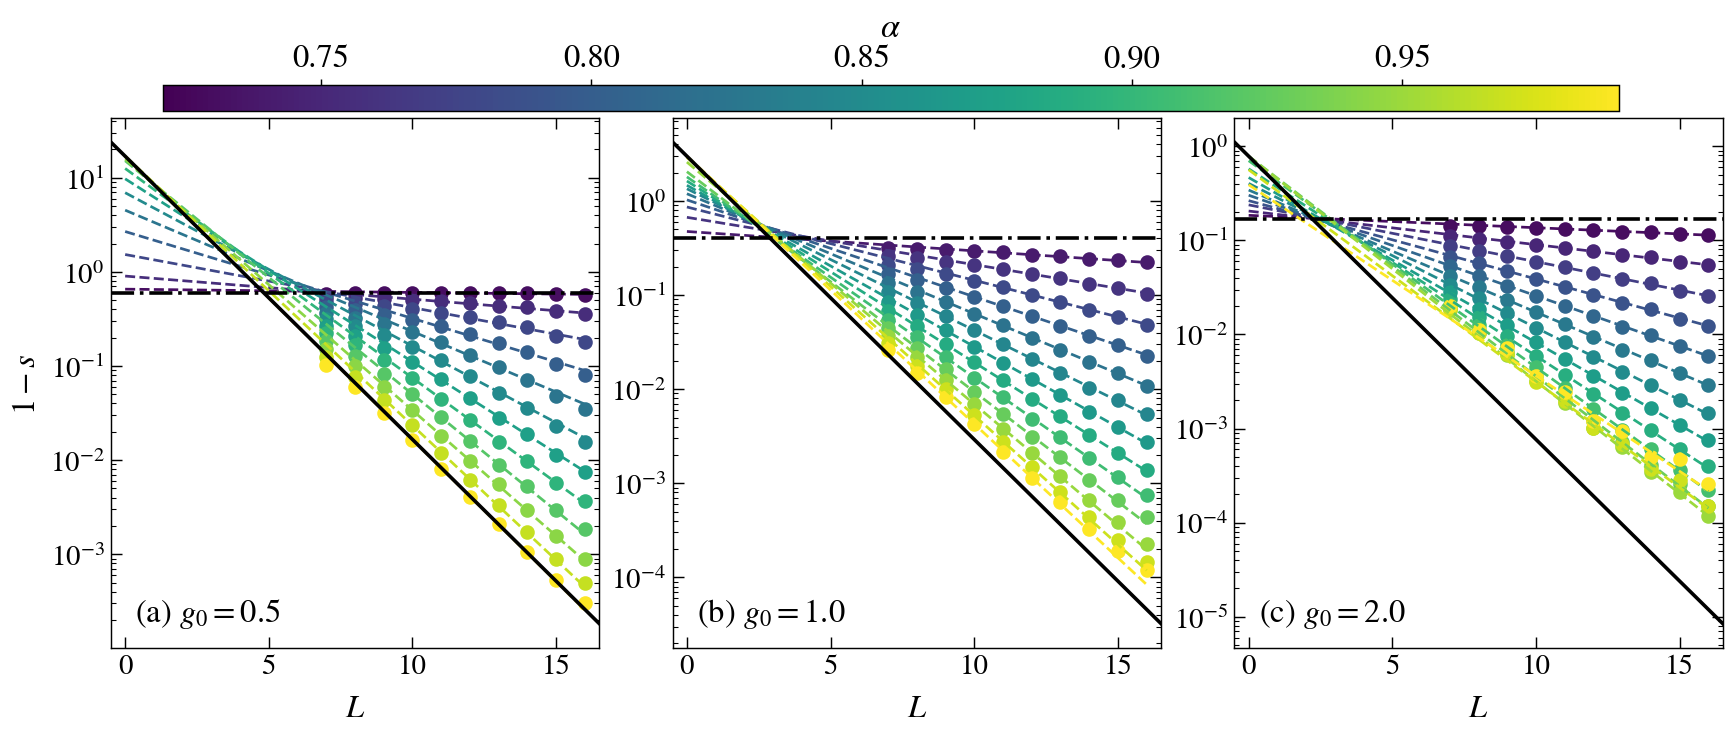

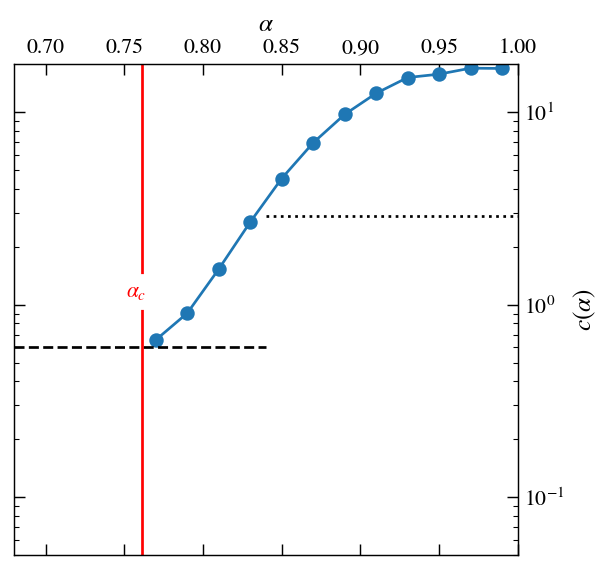

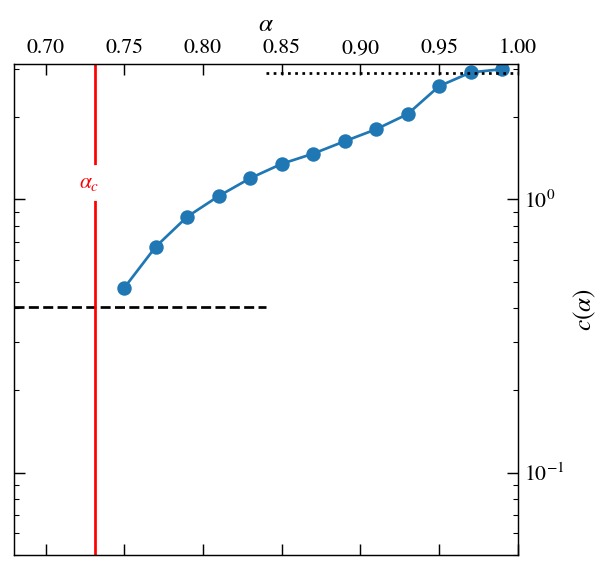

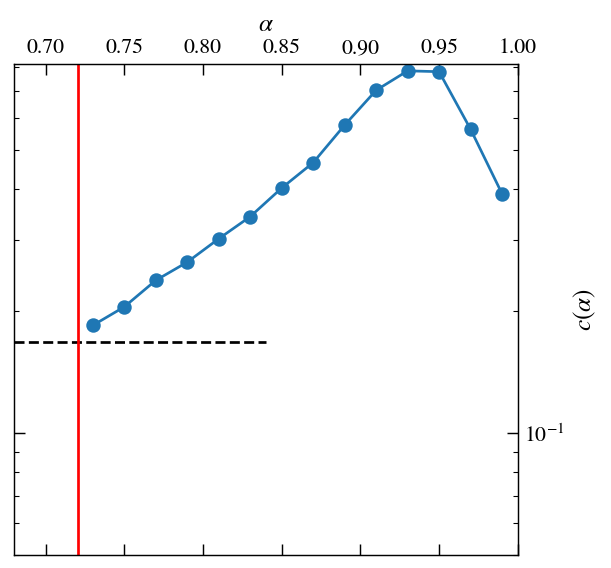

In [55]:
L_total=15
J=3
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, axes = plt.subplots( nrows=1, ncols=3, figsize=(16,5), dpi = 130)

# inset = axis.inset_axes([0.03, 0.03, 0.37, 0.45])

interpolate = 0
use_fit = 1
bin_size = 10
use_area_collapse = 1
dalfa = 0.04

def entropy_fit(L, c, eta):
    return c * np.exp(-L / eta)

p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

sizes = np.arange(10, 19, 1 if p > 0 else 2)

alfa_crit = 0.75
s1_crit = 1
s1_crit = 1

for iiJ, J in enumerate([0.5, 1, 2]):
    axis = axes[iiJ]    
    fig2, inset = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 130)
    
    if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
    if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
    if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
    if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]

    if J == 0.1:    alfa_crit = 0.8838011380886784; s1_crit = 0.11432584064242023; sizes = np.arange(10, 15, Lstep); nu = 0.66573; s1_min = 0.2; 
    elif J == 0.2:  alfa_crit = 0.8088393000000000; s1_crit = 0.19575772032771582; sizes = np.arange(10, 16, Lstep); nu = 0.63364; s1_min = 0.4; 
    elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.27426435352423423; sizes = np.arange(10, 16, Lstep); nu = 0.61334; s1_min = 0.5; 
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.3975596423927653; s1_min = 0.60; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.61; L0 = 4
    elif J == 1:    alfa_crit = 0.7314402852322444; s1_crit = 0.5976612536491842; s1_min = 0.83; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.68; L0 = 3
    elif J == 2:    alfa_crit = 0.7207704442893257; s1_crit = 0.8326330851556897; s1_min = 0.96; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.79; L0 = 2
    elif J == 3:    alfa_crit = 0.71795404;         s1_crit = 0.9063184653468818; s1_min = 0.98; sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.80; L0 = 3
    else:           alfa_crit = 1/np.sqrt(2)


    alfa_min = alfa_crit + 0.0
    alfa_max = 0.99

    interaction = []
    ydata = []
    for L_total in sizes:
        sub_sizes = np.arange(0, L_total+1)
        L = L_total - N
        LA = L_total - p if p > 0 else L_total // 2

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))[::2]
                gap_ratio    = np.array(file.get('gap_ratio'))[::2]
                entropy      = np.array(file.get('entropy'))[:, ::2]
                entropy_site = np.array(file.get('single_site_entropy'))[:, ::2]
        else:
            print(name_out)
        entropy = entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA)
        interaction.append(alfa_vals)
        ydata.append(entropy)

    # alfa_min = alfa_crit - 0.06

    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.
    norm = matplotlib.colors.Normalize(
        vmin=max(alfa_min, np.min(alfa_vals)),
        vmax=min(alfa_max, np.max(alfa_vals))
        )


    # create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
    s_m.set_array([])

    ydata = np.transpose( np.array(ydata) )

    idx_c = 0

    envelope_ydata = []
    envelope_xdata = []
    yax_max = -10
    yax_min = 10
    prefactor = []
    alfa_plot = []
    for ii_a, alfa in enumerate(alfa_vals):
        if alfa < alfa_min or alfa > alfa_max: continue
        if alfa == alfa_crit: idx_c = ii_a
        # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
        col = s_m.to_rgba(alfa)

        xx = sizes - N
        yy = ydata[ii_a]
        axis.scatter(xx, 1 - yy, marker='o', s=50, color=s_m.to_rgba(alfa))
        
        try:
            ii_cut = -10 if interpolate else -6
            ii_cut = -7
            pars, pconv= fit(entropy_fit,
                            xdata = xx[ii_cut:],
                            ydata = 1 - yy[ii_cut:])

            eta = pars[1]
            c = pars[0]
            print("J=", J, "  alfa=", np.round(alfa, 2), "  eta=", eta, "  c=", c)
            prefactor.append(c)
            alfa_plot.append(alfa)
            dense_sizes = np.linspace(0, xx[-1], 1000)
            # dense_sizes = np.linspace(-0.5, 16.5, 1000)
            axis.plot(dense_sizes, entropy_fit(dense_sizes, *pars), lw=1.5, color=s_m.to_rgba(alfa), ls = '--')
        except RuntimeError:
            print(alfa)

    alfa_plot = np.array(alfa_plot)
    prefactor = np.array(prefactor)

    dense_sizes = np.linspace(-0.5, 16.5, 1000)

    axis.axhline(y=1 - s1_crit, ls='-.', c='k', lw=2)
    # s_rmt = 2/np.log(2) / 2**(dense_sizes + N)
    s_rmt = max(prefactor) / 2**(dense_sizes)
    axis.plot(dense_sizes, s_rmt, ls='-', c='k', lw=2)

    # s_rmt2 = 2/np.log(2) / 2**(dense_sizes + N)
    # axis.plot(dense_sizes, s_rmt2, ls=':', c='r', lw=2)


    inset.plot((alfa_plot), (prefactor), marker='o', markersize=7)


    fig_help.set_plot_elements(axis, ylabel=r"$1-s$" if iiJ == 0 else "", xlabel=r"$L$", font_size=16, set_legend=False, xscale='linear', yscale='log')
    # axis.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])

    # axis.yaxis.set_label_coords(-0.02, 0.55)
    # axis.set_yticks([1e-4, 1e-3, 1e-1, 1e0])

    # axis.set_ylim(np.min(s_rmt2), np.max(s_rmt))
    axis.set_xlim(-0.5, 16.5)

    inset.set_xlim(0.68, 1)
    inset.set_ylim(0.05, None)
    inset.axhline(y=2/np.log(2), ls=':', color='k', xmin=0.5)
    inset.axhline(y=1-s1_crit, ls='--', color='k', xmax=0.5)
    inset.axvline(x=alfa_crit, ls='-', color='r')
    inset.annotate(r"${\alpha}_c$", color='r', fontsize=12, xy=(alfa_crit-0.01, 1.1), xycoords='data', backgroundcolor="w")

    # inset.set_ylim(0.251, 0.9)

    inset.xaxis.set_label_position("top")
    # inset.xaxis.set_label_coords(.5, 1.2)
    inset.xaxis.tick_top()
    inset.yaxis.set_label_position("right")
    # inset.yaxis.set_label_coords(.5, 1.2)
    inset.yaxis.tick_right()
    fig_help.set_plot_elements(inset, ylabel=r"${c(\alpha)}$", xlabel=r"$\alpha$", font_size=12, set_legend=False, xscale='linear', yscale='log')
    fig_help.set_legend(inset, loc = 'upper left', fontsize=10)


axes[0].annotate(r"(a) $g_0=0.5$", fontsize=18, xy=(0.05, 0.05), xycoords='axes fraction')
axes[1].annotate(r"(b) $g_0=1.0$", fontsize=18, xy=(0.05, 0.05), xycoords='axes fraction')
axes[2].annotate(r"(c) $g_0=2.0$", fontsize=18, xy=(0.05, 0.05), xycoords='axes fraction')

cbar = None

# fig.subplots_adjust(right=0.94)
# cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
# # fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
# cbar.set_label(r"$\alpha$", fontsize=16)
# cbar.ax.tick_params(labelsize=15)
fig.subplots_adjust(top=0.94)
cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.04])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
cbar.set_label(r"$\alpha$", fontsize=19)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')
cbar_ax.xaxis.set_tick_params(labelsize=18)

# inset.set_xticks([0.7, 0.8, 0.9, 1])
# inset.set_yticks([0.75, 1.0, 1.25, 1/np.log(2), 1-s1_crit])
# inset.set_yticklabels(["0.75", "1", "1.25", r"$1/\ln{2}$", r"$1-s_c$"])

# inset.set_yticks([0.3, 0.4, 0.5, 0.6, 0.8])
# inset.set_yticklabels(['0.3', '0.4', '0.5', '0.6', '0.8'])

fig.subplots_adjust(wspace = 0.15, hspace=0.13)
fig.savefig("plots_beta_final/Fig2.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

## FIGURE 4

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

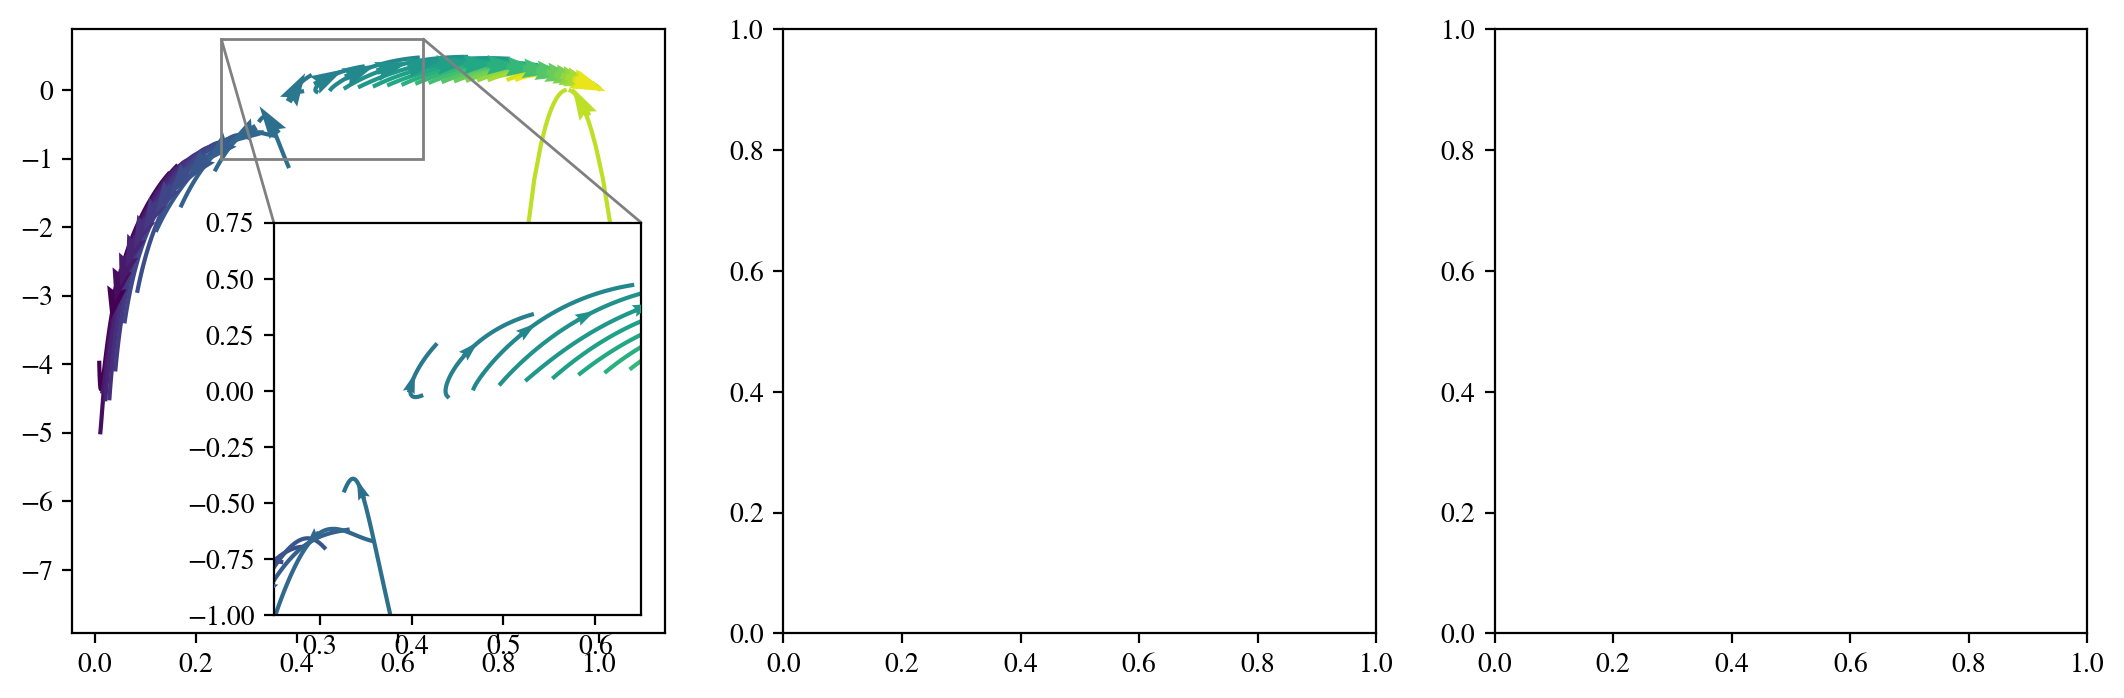

In [64]:


L_total=15
J=0.5
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=3, figsize=(13,4), dpi = 200)
axis = np.array(axis).flatten()

interpolate = 0
use_fit = 1
bin_size = 15
use_area_collapse = 1
dalfa = 0.2
zeta = 1

def const_A(sc, v):
    return 1 - (1-sc) * (1-v) / ( sc * v * (1 - sc + np.log(sc)))
def const_c(sc, v):
    return np.exp( np.log(sc) * (1 - sc*v + v*np.log(sc)) / ( -v * (1 - sc + np.log(sc))) )

def beta0_fun(x, c_ = 1):
    if use_area_collapse: 
        # return 5*(g_ - x) / x
        # return -(g_ - x) / x * np.log( (g_ - x) / c_ )
        return -(1 - x) * np.log( (1 - x) / c_ )
    else:                 return (1 - x) / x 



def pade_fun(x, c0, c1, d0, d1):#, c0, d0):
    # return 1 - c1 * np.exp(-c2 * x)# - d1 * x**(-d2)
    # x = x**0.5
    return (x**2 + c1 * x + c0) / (x**2 + d1 * x + d0)
    # return c1 * np.arctan(c2 * x - d1)
    # return (x**3 + c1*x**2 + c2*x + c3) / (x**3 + d1*x**2 + d2 * x + d3)
    # return 1 - (c0 / x**3 + c1 / x**2 + d0 / x**1 + d1)

def other_fit(x, c0, c1, c2, c3, c4):#, b): 
    # return c1 / np.log(x)**3 + c2 / np.log(x)**2 + c3 / np.log(x)**1 + c4#+ a/np.log(x)**4
    return c4 / x**0.5 + c3 / x**3 + c2 / x**2 + c1 / x + c0 # + a / x**4 + b / x**5
    # return c1 / x**3 + c2 / x**2 + c3 / x**1 + c4 + c5/x**4 + c6/x**5

p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"
alfa_min = 0.65
alfa_max = 0.95

# def other_fit(x, c1, c2, c3, c4, c5):
#     return c1 * (x)**4 + c2 * (x)**3 + c3 * (x)**2 + c4 * (x) + c5
for idx1, J in enumerate([0.5, 1, 2]):
# for idx1, J in enumerate([1, 2, 3]):

    if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
    if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
    if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
    if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]
    # if J == 0.5:  pars2 = [0.20303750039651067, 1.8036078436115275, 1]
    # if J == 1.0:  pars2 = [0.348970604841207, 2.065140649235043, 1]
    # if J == 2.0:  pars2 = [-0.3513769553323467, 1.943929800392859, 1]
    
    sizes = np.arange(10, 19, 1 if p > 0 else 2)
    if J == 0.3: inset = axis[idx1].inset_axes([0.34, 0.03, 0.62, 0.65]);  xin1, xin2, yin1, yin2 = 0.25, 0.65, -1, 0.75
    elif J == 0.5: inset = axis[idx1].inset_axes([0.34, 0.03, 0.62, 0.65]);  xin1, xin2, yin1, yin2 = 0.25, 0.65, -1, 0.75
    elif J == 1: inset = axis[idx1].inset_axes([0.38, 0.03, 0.58, 0.6]);   xin1, xin2, yin1, yin2 = 0.4, 0.9, -0.75, 0.33
    elif J == 2: inset = axis[idx1].inset_axes([0.42, 0.03, 0.56, 0.59]);   xin1, xin2, yin1, yin2 = 0.7, 0.98, -0.3, 0.1
    elif J == 3: inset = axis[idx1].inset_axes([0.42, 0.03, 0.55, 0.52]);  xin1, xin2, yin1, yin2 = 0.82, 0.999, -0.12, 0.06
    #axis[idx1].inset_axes([0.03, 0.52, 0.49, 0.46])
    inset.set_xlim(xin1**zeta, xin2**zeta)
    inset.set_ylim(yin1 * zeta, yin2 * zeta)
        
    
    mark_inset(axis[idx1], inset, loc1=1, loc2=2, fc="none", ec="0.5")
    # if idx1 == 0: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    # if idx1 == 1: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    # if idx1 == 2: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    # if idx1 == 3: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    
    alfa_crit = 0.75
    s1_crit = 1
    if J == 0.3:    alfa_crit = 0.8074711767728078; s1_crit = 0.27426; sizes = np.arange(10, 16, 1 if p > 0 else 2); nu = 0.61334;  s1_min = 0.6; 
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.39708; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.60945;  s1_min = 0.6; 
    elif J == 1:    alfa_crit = 0.7294402852322444; s1_crit = 0.63786; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.68639;  s1_min = 0.8; 
    elif J == 2:    alfa_crit = 0.720371246397683;  s1_crit = 0.83867; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.79797;  s1_min = 0.95;
    elif J == 3:    alfa_crit = 0.7167352842108217; s1_crit = 0.90339; sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.80775;  s1_min = 0.96;
    else:           alfa_crit = 1/np.sqrt(2)
    
    
    
    def entropy_fit(L, L0, eta):
        return (1-s1_crit) * np.exp(-(L - L0) / eta)
    interaction = []
    ydata = []
    for L_total in sizes:
        sub_sizes = np.arange(0, L_total+1)
        L = L_total - N
        LA = L_total - p if p > 0 else L_total // 2

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
        else:
            print(name_out)
        entropy = ( entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA) )
        interaction.append(alfa_vals)
        ydata.append(entropy)

    # alfa_min = alfa_crit - 0.06

    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.
    norm = matplotlib.colors.Normalize(
        vmin=max(alfa_min, np.min(alfa_vals)),
        vmax=min(alfa_max, np.max(alfa_vals)))


    # create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
    s_m.set_array([])
    
    ydata = np.transpose( np.array(ydata) )
    
    idx_c = 0

    envelope_ydata = []
    envelope_xdata = []
    yax_max = -10
    yax_min = 10
    
    x_inset_max = -10
    x_inset_min = 10
    for ii_a, alfa in enumerate(alfa_vals):
        if alfa < alfa_min or alfa > alfa_max: continue
        if alfa == alfa_crit: idx_c = ii_a
        # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
        col = s_m.to_rgba(alfa)

        xx = sizes - N
        yy = ydata[ii_a]
        L0 = 0
        try:
            ii_cut = -10 if interpolate else -6
            ii_cut = -6
            pars, pconv= fit(entropy_fit,
                            xdata = xx,
                            ydata = 1 - yy)

            eta = pars[1]
            L0 = pars[0]
        except RuntimeError:
            print(alfa)
            
        if interpolate:
            f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.0 else 3, s=1)
            xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 2)
            yy = splev(xx, f)
            
        if not use_fit:
            # if use_area_collapse: xx = np.log(xx)
            
            # f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 5, s=3)
            # xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 4)
            # yy = splev(xx, f)
            # beta = splev(xx, f, der=1) * xx / yy
            # xx_beta = yy
            
            beta = diff_central((xx), (yy)) * xx[2:] / yy[2:]
            xx_beta = yy[1:-1]
            
            # beta1 = (beta - envelope_ansatz(xx_beta, *pars2))
            # axis_test[idx1].plot(xx_beta, beta1, marker='o', markersize=0, lw=1.5, color=col, zorder=-2)
            
            
            envelope_ydata = [*envelope_ydata, *(beta)]
            envelope_xdata = [*envelope_xdata, *(xx_beta)]
            # envelope_ydata.append(beta[-1])
            # envelope_xdata.append(xx_beta[-1])
            
            axis[idx1].plot(xx_beta, beta, marker='o', markersize=0, lw=1.5, color=col)
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa + 0.03:
                inset.plot(xx_beta, beta, marker='o', markersize=0, lw=1.5, color=col)
                if min(xx_beta) < x_inset_min: x_inset_min = min(xx_beta)
                if max(xx_beta) > x_inset_max: x_inset_max = max(xx_beta)
            
            if min(beta) < yax_min: yax_min = min(beta)
            if max(beta) > yax_max: yax_max = max(beta)
            i1 = xx_beta.size // 2
            u = xx_beta[i1+1] - xx_beta[i1]
            v = beta[i1+1] - beta[i1]
            pos_x = xx_beta[i1] + u/2
            pos_y = beta[i1] + v/2
            norm = np.sqrt(u**2+v**2)

            axis[idx1].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, linewidth=0, width=0.02, headwidth=2)
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa:
                inset.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, linewidth=0, width=0.02, headwidth=4)
            
        else:

            my_fit = pade_fun if alfa > alfa_crit else other_fit
            pars, pconv = fit(my_fit,
                                xdata = xx,
                                ydata = yy,
                                maxfev = 10000
                                )
            xL = np.linspace(xx[0], xx[-1], 100)
            smooth_data = my_fit(xL, *pars)
            # f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 5, s=1)
            # smooth_data = splev(xL, f)
            # deriv = splev(xL, f, der=1) * xL / smooth_data
            # deriv = my_fit_deriv(xL, *pars) * xL / smooth_data if use_area_collapse else my_fit_deriv(xL, *pars) * 1 / smooth_data/ np.log(2)
            # deriv = np.gradient( np.log(smooth_data), np.log(xL) )
            deriv = diff_central(np.log(xL), np.log(smooth_data))
            smooth_data = smooth_data[1:-1]
            
            axis[idx1].plot(smooth_data, deriv, lw=1.5, color=col, zorder=-2)
            
            # beta1 = (deriv - envelope_ansatz(smooth_data, *pars2))
            # # axis_test[idx1].plot(smooth_data, deriv - envelope_ansatz(smooth_data, *pars2), lw=1.5, color=col, zorder=-2)
            # axis_test[idx1].plot(smooth_data, beta1, lw=1.5, color=col, zorder=-2)
            
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa + 0.03:
                inset.plot(smooth_data, deriv, lw=1.5, color=col)
                if min(smooth_data) < x_inset_min: x_inset_min = min(smooth_data)
                if max(smooth_data) > x_inset_max: x_inset_max = max(smooth_data)
            
            if min(deriv) < yax_min: yax_min = min(deriv)
            if max(deriv) > yax_max: yax_max = max(deriv)
            
            envelope_ydata = [*envelope_ydata, *(deriv)]
            envelope_xdata = [*envelope_xdata, *(smooth_data)]
            # envelope_ydata = [*envelope_ydata, deriv[-1]]
            # envelope_xdata = [*envelope_xdata, smooth_data[-1]]

            i1 = smooth_data.size // 2
            u = smooth_data[i1+1] - smooth_data[i1]
            v = deriv[i1+1] - deriv[i1]
            pos_x = smooth_data[i1] + u/2
            pos_y = deriv[i1] + v/2
            norm = np.sqrt(u**2+v**2)
        
            axis[idx1].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=-1, pivot="mid", 
                               linewidth=0, width=0.02, headwidth=3, color=col, lw=0)
            
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa:
                inset.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", 
                               linewidth=0, width=0.02, headwidth=3, color=col, lw=0)
            
    # sorting X and Y data according to increasing X
    permut = np.argsort( np.array(envelope_xdata) )
    envelope_ydata = np.array(envelope_ydata)[permut]
    envelope_xdata = np.array(envelope_xdata)[permut]

    size = len(envelope_xdata)
    envelope = np.zeros( (size // bin_size) )
    xxx = np.zeros( (size // bin_size) )

    # Finding maximum Y in each bin of 20 points of interpolated data
    for k in range(envelope.size):
        idx_r = (k+1) * bin_size if k < envelope.size-1 else -1
        idx = np.argmax(envelope_ydata[k * bin_size : idx_r])
        envelope[k] = envelope_ydata[k * bin_size : idx_r][idx]
        xxx[k]      = envelope_xdata[k * bin_size : idx_r][idx]
    # xxx = envelope_xdata
    # envelope = envelope_ydata
    # axis[idx1].scatter(xxx, envelope, s=5, color='k')
    
    print(J, nu)
    # axis[idx1].plot(sp, envelope_pred(sp, nu, s1_crit), lw=2, color='red', ls='--', label=r"${\beta}^*$" if idx1 == 1 else "")
    # axis2[idx1].plot(sp, envelope_pred(sp, nu, s1_crit), lw=2, color='red', ls='--', label=r"${\beta}^*$" if idx1 == 1 else "")
        
    # pars2, pconv2 = fit(envelope_ansatz,
    #                     xdata = xxx,#[envelope        > -0.25],
    #                     ydata = envelope)#[envelope   > -0.25])
    # print("FITTTING PARAMETERS: ", J, *pars2, 1 - s1_crit, "\tln{c}=", np.log(pars2[-1]))
    
    # sp = np.linspace(0, 1, 10000)
    # axis[idx1].plot(sp, envelope_ansatz(sp, *pars2), lw=2, color='red', ls='--', label=r"Eq. (13)" if idx1 == 2 else "")
    # inset.plot(sp, envelope_ansatz(sp, *pars2), lw=2, color='red', ls='--', label=r"Eq. (13)" if idx1 == 2 else "")
    
    
    sp = np.linspace(x_inset_min, x_inset_max, 10000)
    # Defined below
    r = tools.RootFinder(0, 1, 0.001)
    roots = r.find(envelope_ansatz, *pars2)
    # print("Roots: ", roots)
    Sc = roots[0]
    # sp = np.linspace(s1_crit - 0.15, s1_crit + 0.15, 100)
    print("\nCRITICAL EXPONENT AND CRITICAL ENTROPY: ", J, Sc, nu, s1_crit)
    inset.plot(sp, (sp - Sc) / (Sc * nu), c='gray', ls='-', lw=1)
    
    s1_crit = Sc
    
    sp = np.linspace(s1_min, 1, 10000)
    
    axis[idx1].set_xlim(min(envelope_xdata)*0.9, 1)
    axis[idx1].set_ylim(1.1*yax_min, 1.5*yax_max)
    if J == 1:
        # axis[idx1].set_xlim(0.3, 1.0)
        axis[idx1].set_ylim(1.25*yax_min, 1.5*yax_max)
    if J == 2:
        # axis[idx1].set_xlim(0.32, 1.0)
        axis[idx1].set_xlim(min(envelope_xdata)*0.99, 1)
        axis[idx1].set_ylim(1.5*yax_min, 2.5*yax_max)
    if J == 3:
        # axis[idx1].set_xlim(0.35, 1.0)
        axis[idx1].set_xlim(min(envelope_xdata)*0.99, 1)
        axis[idx1].set_ylim(1.4*yax_min, 1.2*yax_max)
    
    axis[idx1].axhline(y=0, ls='-', c='k', lw=1)
    inset.axhline(y=0, ls='-', c='k', lw=1)
    xlab = r"$s$"
    # ylab = r"$\tilde{\beta}($" + xlab + "$)$" if use_area_collapse else r"${\beta}($" + xlab + "$)$"
    ylab = r"${\beta}($" + xlab + "$)$"
    fig_help.set_plot_elements(axis[idx1], xlabel=xlab, ylabel=ylab if idx1 == 0 else "", font_size=16, set_legend=False, xscale='linear')
    fig_help.set_legend(axis[idx1], loc = 'center left', fontsize=14, anchor=(-0.02, 0.87))
    
    inset.xaxis.set_label_position("top")
    inset.xaxis.set_label_coords(.5, 1.2)
    inset.xaxis.tick_top()

    fig_help.set_plot_elements(inset, xlabel="", ylabel="", font_size=13, set_legend=False, yscale='linear')
    # fig_help.set_legend(inset, loc = 'center right', fontsize=14)

    # inset.set_xlim(1.1 * Sc, 1.0)
    if idx1 == 0: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.36, 0.08), xycoords='axes fraction')
    if idx1 == 1: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.32, 0.08), xycoords='axes fraction')
    if idx1 == 2: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.3, 0.08), xycoords='axes fraction')
    if idx1 == 3: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.3, 0.08), xycoords='axes fraction')
    
    # inset.set_xlim(s1_crit - 0.2, s1_crit + 0.2);
    # inset.set_ylim(0, 1.1*yax_max)
    
    
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$\alpha$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

for aa in [axis]:
    for ax in np.array(aa).flatten():
        ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))

axis[0].annotate(r"(a) $g_0=0.5$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
axis[1].annotate(r"(b) $g_0=1.0$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
axis[2].annotate(r"(c) $g_0=2.0$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
# axis[0].annotate(r"(a) $g_0=1$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
# axis[1].annotate(r"(b) $g_0=2$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
# axis[2].annotate(r"(c) $g_0=3$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
# axis[3].annotate(r"(d) $g_0=3.0$", fontsize=14, xy=(0.02, 0.94), xycoords='axes fraction')

fig.subplots_adjust(wspace = 0.13, hspace=0.13)
# fig.savefig("plots_beta_final/Fig4.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]
1 0.68639
FITTTING PARAMETERS:  1 3.614304955666519 0.08352740748526408 0.36214 	ln{c}= -2.4825804676256547


No handles with labels found to put in legend.



CRITICAL EXPONENT AND CRITICAL ENTROPY:  1 0.6123455964383775 0.68639 0.63786
0.5 0.60945
FITTTING PARAMETERS:  0.5 4.07985831001524 0.2889830437726464 0.60292 	ln{c}= -1.2413872646579454


No handles with labels found to put in legend.



CRITICAL EXPONENT AND CRITICAL ENTROPY:  0.5 0.36652217066316023 0.60945 0.39708
2 0.79797
FITTTING PARAMETERS:  2 2.69283528581376 0.04370311126999302 0.16132999999999997 	ln{c}= -3.130335983305235

CRITICAL EXPONENT AND CRITICAL ENTROPY:  2 0.8305825240064448 0.79797 0.83867


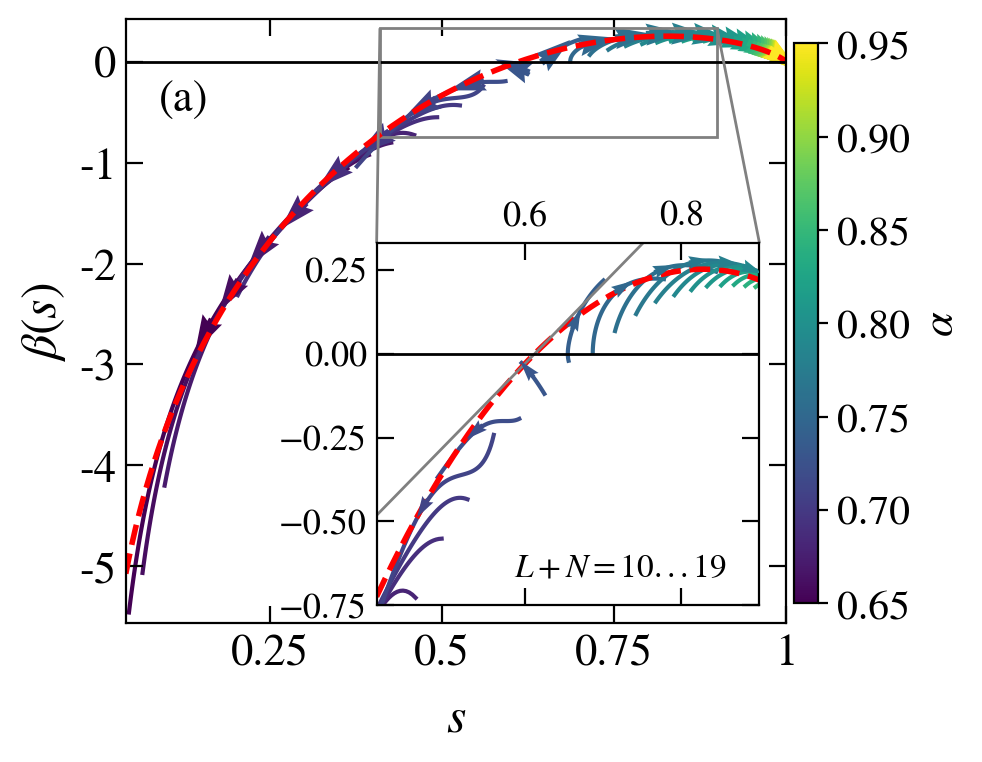

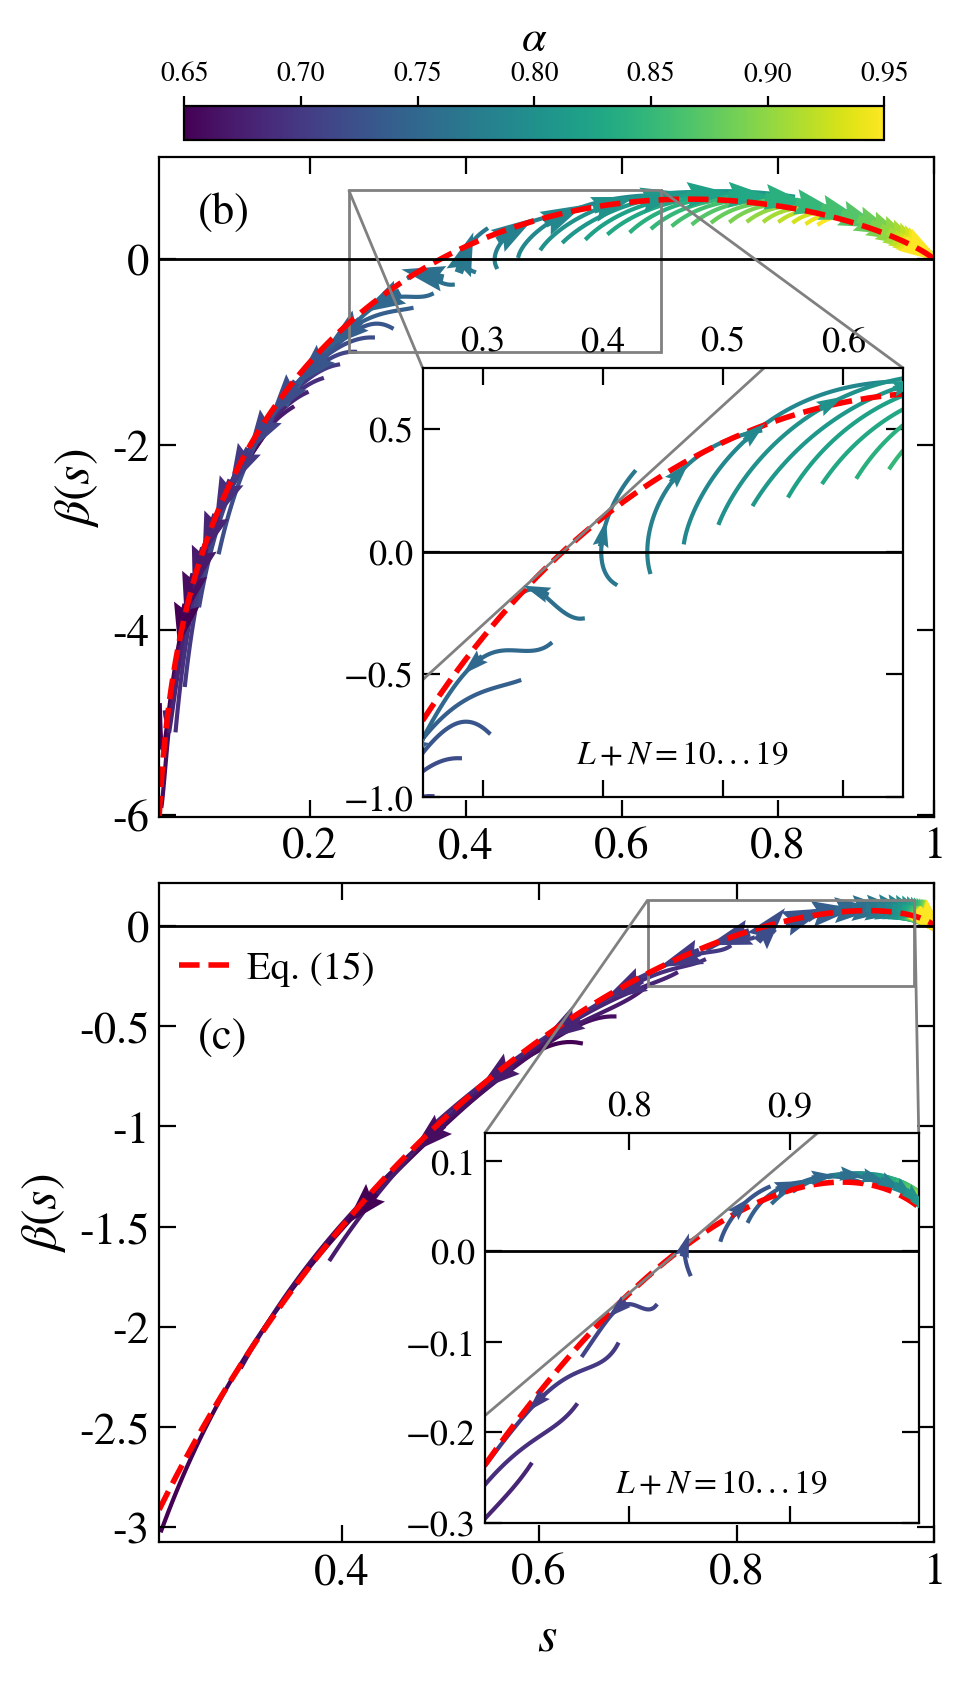

In [31]:


L_total=15
J=0.5
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(4,4), dpi = 200)
fig2, ax2 = plt.subplots( nrows=2, ncols=1, figsize=(5, 8.5), dpi = 200)
axis = [ ax, ax2[0], ax2[1]]
axis = np.array(axis).flatten()

interpolate = 0
use_fit = 1
bin_size = 15
use_area_collapse = 1
dalfa = 0.2
zeta = 1

def const_A(sc, v):
    return 1 - (1-sc) * (1-v) / ( sc * v * (1 - sc + np.log(sc)))
def const_c(sc, v):
    return np.exp( np.log(sc) * (1 - sc*v + v*np.log(sc)) / ( -v * (1 - sc + np.log(sc))) )

def beta0_fun(x, c_ = 1):
    if use_area_collapse: 
        # return 5*(g_ - x) / x
        # return -(g_ - x) / x * np.log( (g_ - x) / c_ )
        return -(1 - x) * np.log( (1 - x) / c_ )
    else:                 return (1 - x) / x 



def pade_fun(x, c0, c1, d0, d1):#, c0, d0):
    # return 1 - c1 * np.exp(-c2 * x)# - d1 * x**(-d2)
    # x = x**0.5
    return (x**2 + c1 * x + c0) / (x**2 + d1 * x + d0)
    # return c1 * np.arctan(c2 * x - d1)
    # return (x**3 + c1*x**2 + c2*x + c3) / (x**3 + d1*x**2 + d2 * x + d3)
    # return 1 - (c0 / x**3 + c1 / x**2 + d0 / x**1 + d1)

def other_fit(x, c0, c1, c2, c3, c4):#, b): 
    # return c1 / np.log(x)**3 + c2 / np.log(x)**2 + c3 / np.log(x)**1 + c4#+ a/np.log(x)**4
    return c4 / x**0.5 + c3 / x**3 + c2 / x**2 + c1 / x + c0 # + a / x**4 + b / x**5
    # return c1 / x**3 + c2 / x**2 + c3 / x**1 + c4 + c5/x**4 + c6/x**5

p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"
alfa_min = 0.65
alfa_max = 0.95

# def other_fit(x, c1, c2, c3, c4, c5):
#     return c1 * (x)**4 + c2 * (x)**3 + c3 * (x)**2 + c4 * (x) + c5
for idx1, J in enumerate([1, 0.5, 2]):
# for idx1, J in enumerate([1, 2, 3]):

    if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
    if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
    if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
    if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]
    # if J == 0.5:  pars2 = [0.20303750039651067, 1.8036078436115275, 1]
    # if J == 1.0:  pars2 = [0.348970604841207, 2.065140649235043, 1]
    # if J == 2.0:  pars2 = [-0.3513769553323467, 1.943929800392859, 1]
    
    sizes = np.arange(10, 19, 1 if p > 0 else 2)
    if J == 0.3: inset = axis[idx1].inset_axes([0.34, 0.03, 0.62, 0.65]);  xin1, xin2, yin1, yin2 = 0.25, 0.65, -1, 0.75
    elif J == 0.5: inset = axis[idx1].inset_axes([0.34, 0.03, 0.62, 0.65]);  xin1, xin2, yin1, yin2 = 0.25, 0.65, -1, 0.75
    elif J == 1: inset = axis[idx1].inset_axes([0.38, 0.03, 0.58, 0.6]);   xin1, xin2, yin1, yin2 = 0.41, 0.9, -0.75, 0.33
    elif J == 2: inset = axis[idx1].inset_axes([0.42, 0.03, 0.56, 0.59]);   xin1, xin2, yin1, yin2 = 0.71, 0.98, -0.3, 0.13
    elif J == 3: inset = axis[idx1].inset_axes([0.42, 0.03, 0.55, 0.52]);  xin1, xin2, yin1, yin2 = 0.82, 0.999, -0.12, 0.06
    #axis[idx1].inset_axes([0.03, 0.52, 0.49, 0.46])
    inset.set_xlim(xin1**zeta, xin2**zeta)
    inset.set_ylim(yin1 * zeta, yin2 * zeta)
    
    mark_inset(axis[idx1], inset, loc1=1, loc2=2, fc="none", ec="0.5")
    # if idx1 == 0: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    # if idx1 == 1: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    # if idx1 == 2: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    # if idx1 == 3: inset = inset_axes(axis[idx1], 1,1 , loc1=1, loc2=3, bbox_to_anchor=(.08, 0.35),bbox_transform=axfft.figure.transFigure)
    
    alfa_crit = 0.75
    s1_crit = 1
    if J == 0.3:    alfa_crit = 0.8074711767728078; s1_crit = 0.27426; sizes = np.arange(10, 16, 1 if p > 0 else 2); nu = 0.61334;  s1_min = 0.6; 
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.39708; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.60945;  s1_min = 0.6; 
    elif J == 1:    alfa_crit = 0.7294402852322444; s1_crit = 0.63786; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.68639;  s1_min = 0.8; 
    elif J == 2:    alfa_crit = 0.720371246397683;  s1_crit = 0.83867; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.79797;  s1_min = 0.95;
    elif J == 3:    alfa_crit = 0.7167352842108217; s1_crit = 0.90339; sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.80775;  s1_min = 0.96;
    else:           alfa_crit = 1/np.sqrt(2)
    
    interaction = []
    ydata = []
    for L_total in sizes:
        sub_sizes = np.arange(0, L_total+1)
        L = L_total - N
        LA = L_total - p if p > 0 else L_total // 2

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
        else:
            print(name_out)
        entropy = ( entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA) )
        interaction.append(alfa_vals)
        ydata.append(entropy)

    # alfa_min = alfa_crit - 0.06

    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.
    norm = matplotlib.colors.Normalize(
        vmin=max(alfa_min, np.min(alfa_vals)),
        vmax=min(alfa_max, np.max(alfa_vals)))


    # create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
    s_m.set_array([])
    
    ydata = np.transpose( np.array(ydata) )
    
    idx_c = 0

    envelope_ydata = []
    envelope_xdata = []
    yax_max = -10
    yax_min = 10
    
    x_inset_max = -10
    x_inset_min = 10
    for ii_a, alfa in enumerate(alfa_vals):
        if alfa < alfa_min or alfa > alfa_max: continue
        if alfa == alfa_crit: idx_c = ii_a
        # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
        col = s_m.to_rgba(alfa)

        xx = sizes - N
        yy = ydata[ii_a]
        if interpolate:
            f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.0 else 3, s=1)
            xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 2)
            yy = splev(xx, f)
            
        if not use_fit:
            # if use_area_collapse: xx = np.log(xx)
            
            # f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 5, s=3)
            # xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 4)
            # yy = splev(xx, f)
            # beta = splev(xx, f, der=1) * xx / yy
            # xx_beta = yy
            
            beta = diff_central((xx), (yy)) * xx[2:] / yy[2:]
            xx_beta = yy[1:-1]
            
            # beta1 = (beta - envelope_ansatz(xx_beta, *pars2))
            # axis_test[idx1].plot(xx_beta, beta1, marker='o', markersize=0, lw=1.5, color=col, zorder=-2)
            
            
            envelope_ydata = [*envelope_ydata, *(beta)]
            envelope_xdata = [*envelope_xdata, *(xx_beta)]
            # envelope_ydata.append(beta[-1])
            # envelope_xdata.append(xx_beta[-1])
            
            axis[idx1].plot(xx_beta, beta, marker='o', markersize=0, lw=1.5, color=col)
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa + 0.03:
                inset.plot(xx_beta, beta, marker='o', markersize=0, lw=1.5, color=col)
                if min(xx_beta) < x_inset_min: x_inset_min = min(xx_beta)
                if max(xx_beta) > x_inset_max: x_inset_max = max(xx_beta)
            
            if min(beta) < yax_min: yax_min = min(beta)
            if max(beta) > yax_max: yax_max = max(beta)
            i1 = xx_beta.size // 2
            u = xx_beta[i1+1] - xx_beta[i1]
            v = beta[i1+1] - beta[i1]
            pos_x = xx_beta[i1] + u/2
            pos_y = beta[i1] + v/2
            norm = np.sqrt(u**2+v**2)

            axis[idx1].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, linewidth=0, width=0.02, headwidth=2)
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa:
                inset.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, linewidth=0, width=0.02, headwidth=4)
            
        else:

            my_fit = pade_fun if alfa > alfa_crit else other_fit
            pars, pconv = fit(my_fit,
                                xdata = xx,
                                ydata = yy,
                                maxfev = 10000
                                )
            xL = np.linspace(xx[0], xx[-1], 100)
            smooth_data = my_fit(xL, *pars)
            # f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 5, s=1)
            # smooth_data = splev(xL, f)
            # deriv = splev(xL, f, der=1) * xL / smooth_data
            # deriv = my_fit_deriv(xL, *pars) * xL / smooth_data if use_area_collapse else my_fit_deriv(xL, *pars) * 1 / smooth_data/ np.log(2)
            # deriv = np.gradient( np.log(smooth_data), np.log(xL) )
            deriv = diff_central(np.log(xL), np.log(smooth_data))
            smooth_data = smooth_data[1:-1]
            
            axis[idx1].plot(smooth_data, deriv, lw=1.5, color=col, zorder=-2)
            
            # beta1 = (deriv - envelope_ansatz(smooth_data, *pars2))
            # # axis_test[idx1].plot(smooth_data, deriv - envelope_ansatz(smooth_data, *pars2), lw=1.5, color=col, zorder=-2)
            # axis_test[idx1].plot(smooth_data, beta1, lw=1.5, color=col, zorder=-2)
            
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa + 0.03:
                inset.plot(smooth_data, deriv, lw=1.5, color=col)
                if min(smooth_data) < x_inset_min: x_inset_min = min(smooth_data)
                if max(smooth_data) > x_inset_max: x_inset_max = max(smooth_data)
            
            if min(deriv) < yax_min: yax_min = min(deriv)
            if max(deriv) > yax_max: yax_max = max(deriv)
            
            envelope_ydata = [*envelope_ydata, *(deriv)]
            envelope_xdata = [*envelope_xdata, *(smooth_data)]
            # envelope_ydata = [*envelope_ydata, deriv[-1]]
            # envelope_xdata = [*envelope_xdata, smooth_data[-1]]

            i1 = smooth_data.size // 2
            u = smooth_data[i1+1] - smooth_data[i1]
            v = deriv[i1+1] - deriv[i1]
            pos_x = smooth_data[i1] + u/2
            pos_y = deriv[i1] + v/2
            norm = np.sqrt(u**2+v**2)
        
            axis[idx1].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=-1, pivot="mid", 
                               linewidth=0, width=0.02, headwidth=3, color=col, lw=0)
            
            if alfa > alfa_crit - dalfa and alfa < alfa_crit + dalfa:
                inset.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", 
                               linewidth=0, width=0.02, headwidth=3, color=col, lw=0)
            
    # sorting X and Y data according to increasing X
    permut = np.argsort( np.array(envelope_xdata) )
    envelope_ydata = np.array(envelope_ydata)[permut]
    envelope_xdata = np.array(envelope_xdata)[permut]

    size = len(envelope_xdata)
    envelope = np.zeros( (size // bin_size) )
    xxx = np.zeros( (size // bin_size) )

    # Finding maximum Y in each bin of 20 points of interpolated data
    for k in range(envelope.size):
        idx_r = (k+1) * bin_size if k < envelope.size-1 else -1
        idx = np.argmax(envelope_ydata[k * bin_size : idx_r])
        envelope[k] = envelope_ydata[k * bin_size : idx_r][idx]
        xxx[k]      = envelope_xdata[k * bin_size : idx_r][idx]
    # xxx = envelope_xdata
    # envelope = envelope_ydata
    # axis[idx1].scatter(xxx, envelope, s=5, color='k')
    
    print(J, nu)
    # axis[idx1].plot(sp, envelope_pred(sp, nu, s1_crit), lw=2, color='red', ls='--', label=r"${\beta}^*$" if idx1 == 1 else "")
    # axis2[idx1].plot(sp, envelope_pred(sp, nu, s1_crit), lw=2, color='red', ls='--', label=r"${\beta}^*$" if idx1 == 1 else "")
        
    pars2, pconv2 = fit(envelope_ansatz,
                        xdata = xxx,#[envelope        > -0.25],
                        ydata = envelope)#[envelope   > -0.25])
    print("FITTTING PARAMETERS: ", J, *pars2, 1 - s1_crit, "\tln{c}=", np.log(pars2[-1]))
    
    sp = np.linspace(0, 1, 10000)
    axis[idx1].plot(sp, envelope_ansatz(sp, *pars2), lw=2, color='red', ls='--', label=r"Eq. (15)" if idx1 == 2 else "")
    inset.plot(sp, envelope_ansatz(sp, *pars2), lw=2, color='red', ls='--', label=r"Eq. (15)" if idx1 == 2 else "")
    
    
    sp = np.linspace(x_inset_min, x_inset_max, 10000)
    # Defined below
    r = tools.RootFinder(0, 1, 0.001)
    roots = r.find(envelope_ansatz, *pars2)
    # print("Roots: ", roots)
    Sc = roots[0]
    # sp = np.linspace(s1_crit - 0.15, s1_crit + 0.15, 100)
    print("\nCRITICAL EXPONENT AND CRITICAL ENTROPY: ", J, Sc, nu, s1_crit)
    inset.plot(sp, (sp - Sc) / (Sc * nu), c='gray', ls='-', lw=1)
    
    s1_crit = Sc
    
    sp = np.linspace(s1_min, 1, 10000)
    
    axis[idx1].set_xlim(min(envelope_xdata)*0.9, 1)
    axis[idx1].set_ylim(1.02*yax_min, 1.5*yax_max)
    if J == 1:
        # axis[idx1].set_xlim(0.3, 1.0)
        axis[idx1].set_ylim(1.02*yax_min, 1.5*yax_max)
    if J == 2:
        # axis[idx1].set_xlim(0.32, 1.0)
        axis[idx1].set_xlim(min(envelope_xdata)*0.99, 1)
        axis[idx1].set_ylim(1.02*yax_min, 2.5*yax_max)
    if J == 3:
        # axis[idx1].set_xlim(0.35, 1.0)
        axis[idx1].set_xlim(min(envelope_xdata)*0.99, 1)
        axis[idx1].set_ylim(1.4*yax_min, 1.2*yax_max)
    
    axis[idx1].axhline(y=0, ls='-', c='k', lw=1)
    inset.axhline(y=0, ls='-', c='k', lw=1)
    xlab = r"$s$"
    # ylab = r"$\tilde{\beta}($" + xlab + "$)$" if use_area_collapse else r"${\beta}($" + xlab + "$)$"
    ylab = r"${\beta}($" + xlab + "$)$"
    fig_help.set_plot_elements(axis[idx1], xlabel=xlab if idx1 != 1 else "", ylabel=ylab, font_size=16, set_legend=False, xscale='linear')
    fig_help.set_legend(axis[idx1], loc = 'center left', fontsize=14, anchor=(-0.02, 0.87))
    
    inset.xaxis.set_label_position("top")
    inset.xaxis.set_label_coords(.5, 1.2)
    inset.xaxis.tick_top()

    fig_help.set_plot_elements(inset, xlabel="", ylabel="", font_size=13, set_legend=False, yscale='linear')
    # fig_help.set_legend(inset, loc = 'center right', fontsize=14)

    # inset.set_xlim(1.1 * Sc, 1.0)
    if idx1 == 0: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.36, 0.08), xycoords='axes fraction')
    if idx1 == 1: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.32, 0.08), xycoords='axes fraction')
    if idx1 == 2: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.3, 0.08), xycoords='axes fraction')
    if idx1 == 3: inset.annotate(r"$L+N=%d...%d$"%(min(sizes), max(sizes)), fontsize=12, xy=(0.3, 0.08), xycoords='axes fraction')
    
    # inset.set_xlim(s1_crit - 0.2, s1_crit + 0.2);
    # inset.set_ylim(0, 1.1*yax_max)
    
    
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.03, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$\alpha$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

for aa in [axis]:
    for ax in np.array(aa).flatten():
        ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))

axis[0].annotate(r"(a)", fontsize=16, xy=(0.05, 0.85), xycoords='axes fraction', backgroundcolor="w")
axis[1].annotate(r"(b)", fontsize=16, xy=(0.05, 0.9), xycoords='axes fraction', backgroundcolor="w")
axis[2].annotate(r"(c)", fontsize=16, xy=(0.05, 0.75), xycoords='axes fraction', backgroundcolor="w")
# axis[0].annotate(r"(a) $g_0=1$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
# axis[1].annotate(r"(b) $g_0=2$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
# axis[2].annotate(r"(c) $g_0=3$", fontsize=14, xy=(0.01, 1.04), xycoords='axes fraction')
# axis[3].annotate(r"(d) $g_0=3.0$", fontsize=14, xy=(0.02, 0.94), xycoords='axes fraction')

fig.subplots_adjust(wspace = 0.13, hspace=0.13)
fig.savefig("plots_beta_final/Fig4.pdf", bbox_inches = 'tight', pad_inches=0.02)

fig2.subplots_adjust(top=0.94)
cbar_ax = fig2.add_axes([0.15, 0.95, 0.7, 0.02])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig2.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
cbar.set_label(r"$\alpha$", fontsize=16)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')

fig2.subplots_adjust(wspace = 0.13, hspace=0.1)
fig2.savefig("plots_beta_final/Fig4b.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

## FIGURE 3

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]
J= 0.5   alfa= 0.78   eta= 48.729885339244625   c= 0.6672327226219261
J= 0.5   alfa= 0.79   eta= 23.55529106852267   c= 0.7488694494443686
J= 0.5   alfa= 0.8   eta= 14.762213073731175   c= 0.8562989196514895
J= 0.5   alfa= 0.81   eta= 10.301565512785533   c= 1.0043450874748887
J= 0.5   alfa= 0.82   eta= 7.947887619175411   c= 1.1610179938042602
J= 0.5   alfa= 0.83   eta= 6.391506258915829   c= 1.3530267461903551
J= 0.5   alfa= 0.84   eta= 5.350487404838526   c= 1.5626622759338185
J= 0.5   alfa= 0.85   eta= 4.620960635062561   c= 1.7817875698511743
J= 0.5   alfa= 0.86   eta= 4.067966292347745   c= 2.0207546489880683
J= 0.5   alfa= 0.87   eta= 3.643783322796681   c= 2.269650748576253
J= 0.5   alfa= 0.88   eta= 3.302250872398003   c= 2.534498896682435
J= 0.5   alfa= 0.89   eta= 3.0155405857169995   c= 2.83200837166376
J= 0.5   alfa= 0.9 

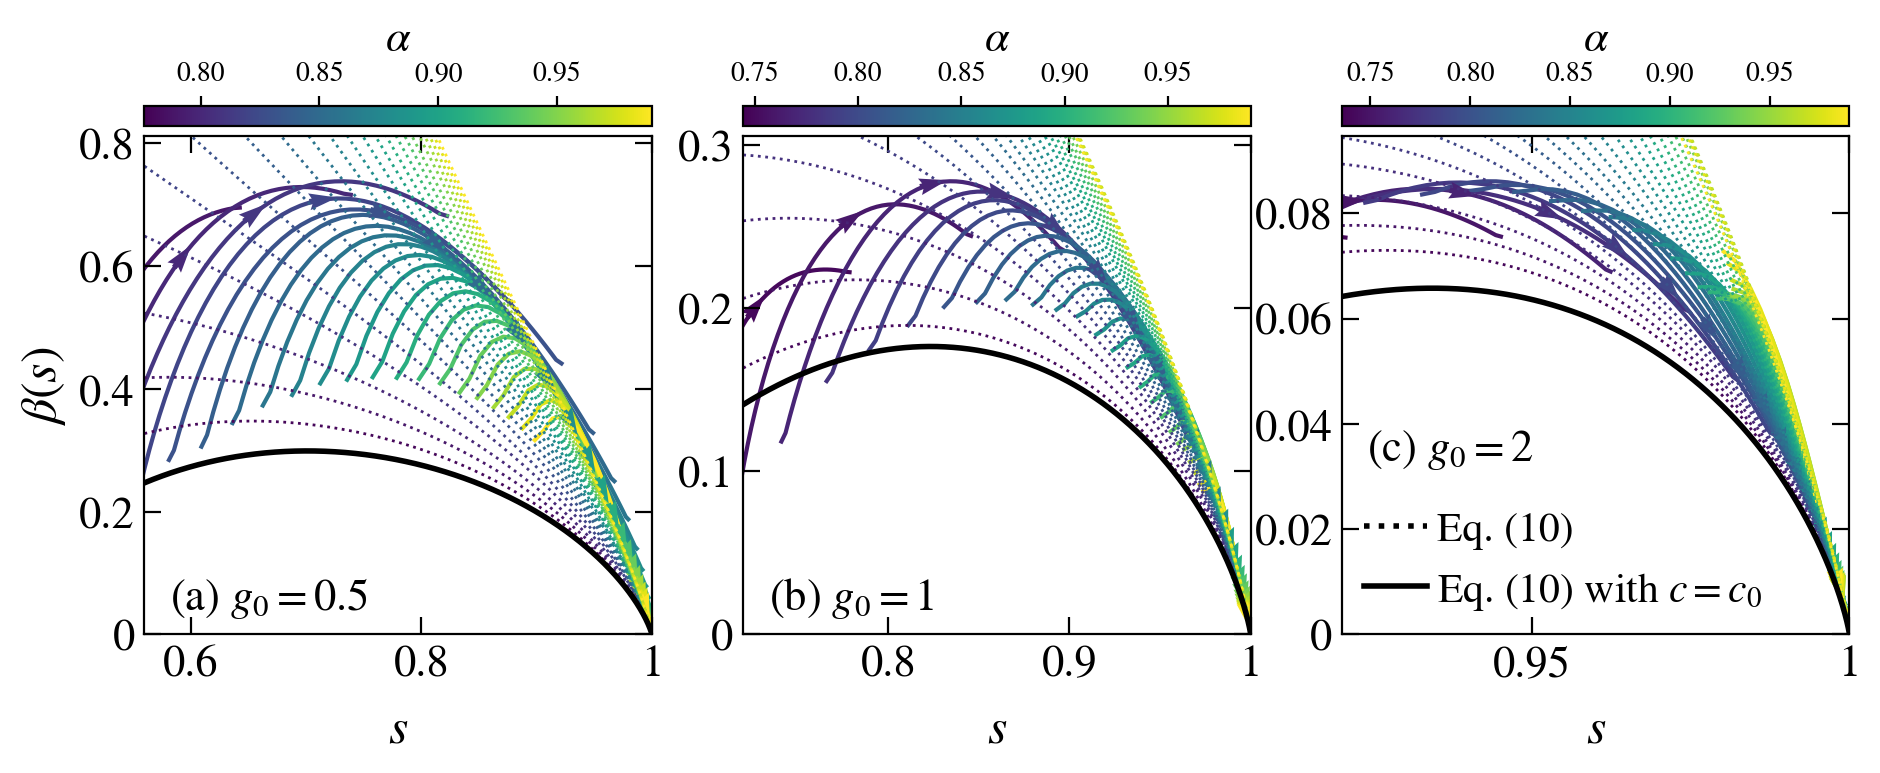

In [85]:
L_total=15
J=2
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=3, figsize=(11,3.5), dpi = 200)

interpolate = 0
use_fit = 1
bin_size = 5
use_area_collapse = 1
dalfa = 0.04

def pade_fun(x, c1, c2, d1, d2):
    return ( x**2 + c1 * x + c2) / (x**2 + d1 * x + d2)

def other_fit(x, c1, c2, c3, c4):
    return c1 / x**3 + c2 / x**2 + c3 / x**1 + c4


    
def entropy_fit(L, c, eta):
    return c * np.exp(-(L) / eta)

p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

alfa_min = 0.8
alfa_max = 0.99
for jj, J in enumerate( [0.5, 1, 2] ):
# for jj, J in enumerate( [0.5, 3] ):
        
    sizes = np.arange(10, 19, 1 if p > 0 else 2)

    alfa_crit = 0.75
    s1_crit = 1
    s1_crit = 1

    if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
    if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
    if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
    if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]

    if J == 0.1:    alfa_crit = 0.8838011380886784; s1_crit = 0.11432584064242023; sizes = np.arange(10, 15, 1); nu = 0.66573; s1_min = 0.1; 
    elif J == 0.2:  alfa_crit = 0.8088393000000000; s1_crit = 0.19575772032771582; sizes = np.arange(10, 16, 1); nu = 0.63364; s1_min = 0.2; 
    elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.27426435352423423; sizes = np.arange(10, 16, 1); nu = 0.61334; s1_min = 0.3; 
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.3975596423927653; s1_min = 0.56;  sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.61
    elif J == 1:    alfa_crit = 0.7294402852322444; s1_crit = 0.5976612536491842; s1_min = 0.72;  sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.68
    elif J == 2:    alfa_crit = 0.7207704442893257; s1_crit = 0.8326330851556897; s1_min = 0.92; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.79
    elif J == 3:    alfa_crit = 0.71795404;         s1_crit = 0.9063184653468818; s1_min = 0.95;  sizes = np.arange(10, 19, 1 if p > 0 else 2); nu=0.8
    else:           alfa_crit = 1/np.sqrt(2)

    alfa_min = alfa_crit + 0.015
    
    interaction = []
    ydata = []
    for L_total in sizes:
        sub_sizes = np.arange(0, L_total+1)
        L = L_total - N
        LA = L_total - p if p > 0 else L_total // 2

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
        else:
            print(name_out)
        entropy = entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA)
        interaction.append(alfa_vals)
        ydata.append(entropy)


    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.
    norm = matplotlib.colors.Normalize(
        vmin=max(alfa_min, np.min(alfa_vals)),
        vmax=min(alfa_max, np.max(alfa_vals)) )


    # create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
    s_m.set_array([])

    ydata = np.transpose( np.array(ydata) )

    idx_c = 0

    envelope_ydata = []
    envelope_xdata = []
    yax_max = -10
    yax_min = 10
    prefactor = []
    alfa_plot = []
    for ii_a, alfa in enumerate(alfa_vals):
        if alfa <= alfa_min or alfa > alfa_max: continue
        if alfa == alfa_crit: idx_c = ii_a
        # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
        col = s_m.to_rgba(alfa)

        xx = sizes - N
        yy = ydata[ii_a]
        
        try:
            ii_cut = -10 if interpolate else -6
            ii_cut = -6
            pars, pconv= fit(entropy_fit,
                            xdata = xx,
                            ydata = 1 - yy)

            eta = pars[1]
            c = pars[0]
            print("J=", J, "  alfa=", np.round(alfa, 2), "  eta=", eta, "  c=", c)
            prefactor.append(c)
            alfa_plot.append(alfa)
        except RuntimeError:
            print(alfa)
            
        sp = np.linspace(s1_min, 1, 1000)
        axis[jj].plot(sp, envelope_erg(sp, c=c), lw=1, color=col, ls=':')
        
        if interpolate:
            # print(alfa, xx, yy)
            # spl = make_spline(xx, yy)
            # yy = spl(xx)
            f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 5, s=5)
            xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 3)
            yy = splev(xx, f)
            
        if not use_fit:
            f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 3, s=2)
            yy = splev(xx, f)
            # if use_area_collapse: xx = np.log(xx)
            beta = diff_central(xx, (yy)) * xx[1:-1] / yy[1:-1]
            xx_beta = yy[1:-1]
            envelope_ydata.append(beta[-1])
            envelope_xdata.append(xx_beta[-1])
            
            axis[jj].plot(xx_beta, beta, marker='o', markersize=2, lw=1.5, color=col)
            
            if min(beta) < yax_min: yax_min = min(beta)
            if max(beta) > yax_max: yax_max = max(beta)
            i1 = xx.size // 2
            u = xx_beta[i1+1] - xx_beta[i1]
            v = beta[i1+1] - beta[i1]
            pos_x = xx_beta[i1] + u/2
            pos_y = beta[i1] + v/2
            norm = np.sqrt(u**2+v**2)

            axis[jj].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0)
        else:

            my_fit = pade_fun if alfa > alfa_crit else other_fit
            # my_fit_deriv = pade_fun_deriv if alfa > alfa_crit else other_fit_deriv
            pars, pconv = fit(my_fit,
                                xdata = xx,
                                ydata = yy,
                                maxfev = 10000
                                )
            xL = np.linspace(xx[0], xx[-1], 50)
            smooth_data = my_fit(xL, *pars)
            # deriv       = my_fit_deriv(xL, *pars) * xL / smooth_data
            deriv = np.gradient( np.log(smooth_data), np.log(xL) )

            axis[jj].plot(smooth_data, deriv, lw=1.5, color=col, zorder=-2)
            
            if min(deriv) < yax_min: yax_min = min(deriv)
            if max(deriv) > yax_max: yax_max = max(deriv)
            
            # envelope_ydata = [*envelope_ydata, *deriv]
            # envelope_xdata = [*envelope_xdata, *smooth_data]
            envelope_ydata = [*envelope_ydata, deriv[-1]]
            envelope_xdata = [*envelope_xdata, smooth_data[-1]]

            i1 = smooth_data.size // 2
            u = smooth_data[i1+1] - smooth_data[i1]
            v = deriv[i1+1] - deriv[i1]
            pos_x = smooth_data[i1] + u/2
            pos_y = deriv[i1] + v/2
            norm = np.sqrt(u**2+v**2)
        
            axis[jj].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=-1, pivot="mid", 
                                linewidth=0, width=0.02, headwidth=3, color=col, lw=0)


    axis[jj].set_ylim(0, None)
    axis[jj].set_ylim(0, 1.1*yax_max)

    axis[jj].axhline(y=0, ls='-', c='k', lw=1)
    
    
    axis[jj].plot(np.nan, np.nan, lw=2, color='k', ls=':', label=r"Eq. (10)" if jj == 2 else "")
    sp = np.linspace(s1_crit, 1, 10000)        
    # axis[jj].plot(sp, envelope_ansatz(sp, *pars2), lw=2, color='red', ls='--', label=r"Eq. (13)" if jj == 0 else "")
    # axis[0].plot(sp, envelope_sp(sp, s1_crit), lw=2, color='k', ls='--', label=r"SP" if idx1 == 1 else "")
    # axis[jj].plot(sp, envelope_sp(sp, sc=1-1/np.log(2)), lw=2, color='violet', ls='-.', label=r"Eq. (S16)" if jj == 1 else "")
    axis[jj].plot(sp, envelope_sp(sp, sc=s1_crit), lw=2, color='k', ls='-', label=r"Eq. (10) with $c=c_{0}$" if jj == 2 else "")
    
    axis[jj].set_xlim(s1_min, 1)
    
    
    cbar = None

    divider = make_axes_locatable(axis[jj])
    cax = divider.new_vertical(size = '4%', pad = 0.05)

    fig.add_axes(cax)
    cbar = fig.colorbar(s_m, cax = cax, orientation = 'horizontal')
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('top')

    cbar.set_label(r"$\alpha$", fontsize=16)
    
xlab = r"$s$"
# ylab = r"$\tilde{\beta}($" + xlab + "$)$" if use_area_collapse else r"${\beta}($" + xlab + "$)$"
ylab = r"${\beta}($" + xlab + "$)$"
fig_help.set_plot_elements(axis[1], xlabel=xlab, ylabel="", font_size=16, set_legend=False, xscale='linear')
fig_help.set_plot_elements(axis[2], xlabel=xlab, ylabel="", font_size=16, set_legend=False, xscale='linear')
fig_help.set_legend(axis[2], loc = 'lower left', fontsize=15, anchor=(-0.03, -0.03))
# cbar = None

# fig.subplots_adjust(top=0.94)
# cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.04])
# # fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
# cbar.set_label(r"$\alpha$", fontsize=16)
# cbar_ax.xaxis.set_ticks_position('top')
# cbar_ax.xaxis.set_label_position('top')


# axis[0].plot(sp, -(1-sp) / sp * np.log(1-sp) + (1-sp) * np.log(c), lw=2, color='pink', ls='-.', label=r"SP2" if idx1 == 1 else "")

axis[0].annotate(r"(a) $g_0=0.5$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
axis[1].annotate(r"(b) $g_0=1$", fontsize=16,   xy=(0.05, 0.05), xycoords='axes fraction')
axis[2].annotate(r"(c) $g_0=2$",   fontsize=16, xy=(0.05, 0.35), xycoords='axes fraction')

fig_help.set_plot_elements(axis[0], ylabel=r"$\beta(s)$", xlabel=r"$s$", font_size=16, set_legend=False, xscale='linear', yscale='linear')
# axis[1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])

for ax in axis:
    ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
# axis[0].yaxis.set_label_coords(-0.02, 0.5)
# axis[0].set_yticks([0, 0.05, 0.1, 0.2, 0.25])

fig.subplots_adjust(wspace = 0.18, hspace=0.13)
fig.savefig("plots_beta_final/Fig3.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94]
J= 1   alfa= 0.73   eta= 369984359.18095416   c= 0.400831164913658
J= 1   alfa= 0.74   eta= 41.46074476807763   c= 0.442317966725006
J= 1   alfa= 0.75   eta= 20.511112696281575   c= 0.48287660409941524
J= 1   alfa= 0.76   eta= 12.191468226559438   c= 0.5743084262588216
J= 1   alfa= 0.77   eta= 8.306514386807248   c= 0.7139990926854628
J= 1   alfa= 0.78   eta= 6.476161775935651   c= 0.8354696849435335
J= 1   alfa= 0.79   eta= 5.432787360440089   c= 0.9200973493761097
J= 1   alfa= 0.8   eta= 4.724990847737969   c= 0.9870570471954212
J= 1   alfa= 0.81   eta= 4.152699048732038   c= 1.078654254182854
J= 1   alfa= 0.82   eta= 3.7211902233951517   c= 1.1565802488147643
J= 1   alfa= 0.83   eta= 3.3693159617655155   c= 1.246897207827379
J= 1   alfa= 0.84   eta= 3.093818464459998   c= 1.323663855908598
J= 1   alfa= 0.85   eta= 2.862568466868197

No handles with labels found to put in legend.


J= 2   alfa= 0.81   eta= 4.079190436328573   c= 0.2984389377027491
J= 2   alfa= 0.82   eta= 3.674285614454249   c= 0.31946775387386794
J= 2   alfa= 0.83   eta= 3.37620613779703   c= 0.3313714721482847
J= 2   alfa= 0.84   eta= 3.0949845891950987   c= 0.35879566309348293
J= 2   alfa= 0.85   eta= 2.851105750140375   c= 0.39091976322546146
J= 2   alfa= 0.86   eta= 2.6608156704321506   c= 0.41704840254868353
J= 2   alfa= 0.87   eta= 2.4947194365648047   c= 0.4486258530095476
J= 2   alfa= 0.88   eta= 2.345079205958889   c= 0.48757706013846575
J= 2   alfa= 0.89   eta= 2.2070100006655315   c= 0.5430331598129636
J= 2   alfa= 0.9   eta= 2.0967891616750642   c= 0.5954337236027593
J= 2   alfa= 0.91   eta= 1.989451463854281   c= 0.6764134636671192
J= 2   alfa= 0.92   eta= 1.9123862936987557   c= 0.7372682521769247
J= 2   alfa= 0.93   eta= 1.8593730408860394   c= 0.7806728027611902
J= 2   alfa= 0.94   eta= 1.8322761563853027   c= 0.7850528693661509
J= 2   alfa= 0.95   eta= 1.772852656843131   c= 0.9

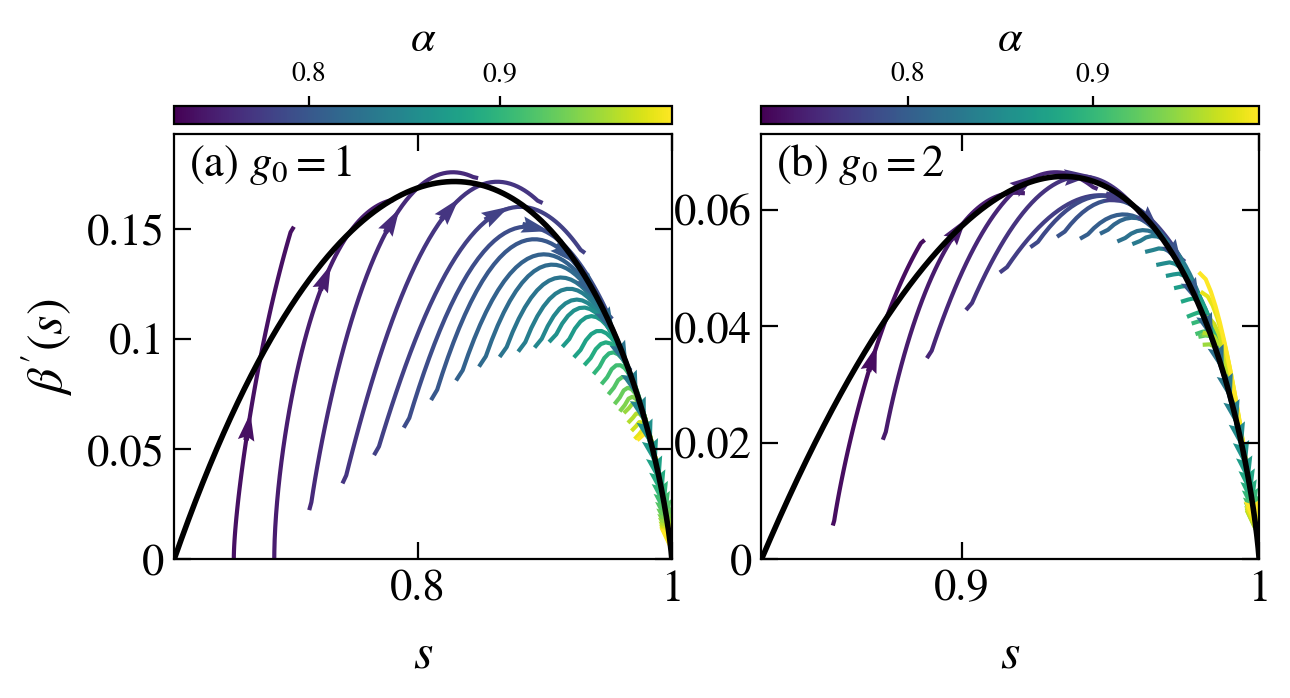

In [91]:
L_total=15
J=2
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(7,3), dpi = 200)

interpolate = 0
use_fit = 1
bin_size = 5
use_area_collapse = 1
dalfa = 0.04

def pade_fun(x, c1, c2, d1, d2):
    return ( x**2 + c1 * x + c2) / (x**2 + d1 * x + d2)

def other_fit(x, c1, c2, c3, c4):
    return c1 / x**3 + c2 / x**2 + c3 / x**1 + c4


p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

alfa_min = 0.8
alfa_max = 0.99
# for jj, J in enumerate( [0.5, 1, 2] ):
for jj, J in enumerate( [1, 2] ):
        
    sizes = np.arange(10, 19, 1 if p > 0 else 2)

    alfa_crit = 0.75
    s1_crit = 1
    s1_crit = 1

    if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
    if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
    if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
    if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]

    if J == 0.1:    alfa_crit = 0.8838011380886784; s1_crit = 0.11432584064242023; sizes = np.arange(10, 15, 1); nu = 0.66573; s1_min = 0.1; 
    elif J == 0.2:  alfa_crit = 0.8088393000000000; s1_crit = 0.19575772032771582; sizes = np.arange(10, 16, 1); nu = 0.63364; s1_min = 0.2; 
    elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.27426435352423423; sizes = np.arange(10, 16, 1); nu = 0.61334; s1_min = 0.3; 
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.3975596423927653; s1_min = 0.56;  sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.61
    elif J == 1:    alfa_crit = 0.7294402852322444; s1_crit = 0.6076612536491842; s1_min = 0.72;  sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.68
    elif J == 2:    alfa_crit = 0.7207704442893257; s1_crit = 0.8326330851556897; s1_min = 0.92; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.79
    elif J == 3:    alfa_crit = 0.71795404;         s1_crit = 0.9063184653468818; s1_min = 0.95;  sizes = np.arange(10, 19, 1 if p > 0 else 2); nu=0.8
    else:           alfa_crit = 1/np.sqrt(2)

    
    def entropy_fit(L, L0, eta):
        return (1-s1_crit) * np.exp(-(L - L0) / eta)
    
    alfa_min = alfa_crit + 0.0
    s1_min = s1_crit
    
    interaction = []
    ydata = []
    for L_total in sizes:
        sub_sizes = np.arange(0, L_total+1)
        L = L_total - N
        LA = L_total - p if p > 0 else L_total // 2

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
        else:
            print(name_out)
        entropy = entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA)
        interaction.append(alfa_vals)
        ydata.append(entropy)


    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.
    norm = matplotlib.colors.Normalize(
        vmin=max(alfa_min, np.min(alfa_vals)),
        vmax=min(alfa_max, np.max(alfa_vals)) )


    # create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
    s_m.set_array([])

    ydata = np.transpose( np.array(ydata) )

    idx_c = 0

    envelope_ydata = []
    envelope_xdata = []
    yax_max = -10
    yax_min = 10
    prefactor = []
    alfa_plot = []
    for ii_a, alfa in enumerate(alfa_vals):
        if alfa <= alfa_min or alfa > alfa_max: continue
        if alfa == alfa_crit: idx_c = ii_a
        # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
        col = s_m.to_rgba(alfa)

        xx = sizes - N
        yy = ydata[ii_a]
        
        try:
            ii_cut = -10 if interpolate else -6
            ii_cut = -6
            pars, pconv= fit(entropy_fit,
                            xdata = xx[ii_cut:],
                            ydata = 1 - yy[ii_cut:])

            eta = pars[1]
            L0 = pars[0]
            c = (1-s1_crit) * np.exp(L0 / eta)
            print("J=", J, "  alfa=", np.round(alfa, 2), "  eta=", eta, "  c=", c)
            prefactor.append(c)
            alfa_plot.append(alfa)
        except RuntimeError:
            print(alfa)
            
        xx = sizes - N - L0
        yy = ydata[ii_a]
        
        # sp = np.linspace(s1_min, 1, 1000)
        # axis[jj].plot(sp, envelope_erg(sp, c=c), lw=1, color=col, ls=':')
        
        if interpolate:
            # print(alfa, xx, yy)
            # spl = make_spline(xx, yy)
            # yy = spl(xx)
            f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 5, s=5)
            xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 3)
            yy = splev(xx, f)
            
        if not use_fit:
            f = splrep(xx, yy, k=3 if alfa < alfa_crit + 0.08 else 3, s=2)
            yy = splev(xx, f)
            # if use_area_collapse: xx = np.log(xx)
            beta = diff_central(xx, (yy)) * xx[1:-1] / yy[1:-1]
            xx_beta = yy[1:-1]
            envelope_ydata.append(beta[-1])
            envelope_xdata.append(xx_beta[-1])
            
            axis[jj].plot(xx_beta, beta, marker='o', markersize=2, lw=1.5, color=col)
            
            if min(beta) < yax_min: yax_min = min(beta)
            if max(beta) > yax_max: yax_max = max(beta)
            i1 = xx.size // 2
            u = xx_beta[i1+1] - xx_beta[i1]
            v = beta[i1+1] - beta[i1]
            pos_x = xx_beta[i1] + u/2
            pos_y = beta[i1] + v/2
            norm = np.sqrt(u**2+v**2)

            axis[jj].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0)
        else:

            my_fit = pade_fun if alfa > alfa_crit else other_fit
            # my_fit_deriv = pade_fun_deriv if alfa > alfa_crit else other_fit_deriv
            pars, pconv = fit(my_fit,
                                xdata = xx,
                                ydata = yy,
                                maxfev = 10000
                                )
            xL = np.linspace(xx[0], xx[-1], 50)
            smooth_data = my_fit(xL, *pars)
            # deriv       = my_fit_deriv(xL, *pars) * xL / smooth_data
            deriv = np.gradient( np.log(smooth_data), np.log(xL) )

            axis[jj].plot(smooth_data, deriv, lw=1.5, color=col, zorder=-2)
            
            if min(deriv) < yax_min: yax_min = min(deriv)
            if max(deriv) > yax_max: yax_max = max(deriv)
            
            # envelope_ydata = [*envelope_ydata, *deriv]
            # envelope_xdata = [*envelope_xdata, *smooth_data]
            envelope_ydata = [*envelope_ydata, deriv[-1]]
            envelope_xdata = [*envelope_xdata, smooth_data[-1]]

            i1 = smooth_data.size // 2
            u = smooth_data[i1+1] - smooth_data[i1]
            v = deriv[i1+1] - deriv[i1]
            pos_x = smooth_data[i1] + u/2
            pos_y = deriv[i1] + v/2
            norm = np.sqrt(u**2+v**2)
        
            axis[jj].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=-1, pivot="mid", 
                                linewidth=0, width=0.02, headwidth=3, color=col, lw=0)


    axis[jj].set_ylim(0, None)
    axis[jj].set_ylim(0, 1.1*yax_max)

    axis[jj].axhline(y=0, ls='-', c='k', lw=1)
    
    
    axis[jj].plot(np.nan, np.nan, lw=2, color='k', ls=':', label=r"Eq. (7)" if jj == 2 else "")
    sp = np.linspace(s1_crit, 1, 10000)        
    # axis[jj].plot(sp, envelope_ansatz(sp, *pars2), lw=2, color='red', ls='--', label=r"Eq. (13)" if jj == 0 else "")
    # axis[0].plot(sp, envelope_sp(sp, s1_crit), lw=2, color='k', ls='--', label=r"SP" if idx1 == 1 else "")
    # axis[jj].plot(sp, envelope_sp(sp, sc=1-1/np.log(2)), lw=2, color='violet', ls='-.', label=r"Eq. (S16)" if jj == 1 else "")
    axis[jj].plot(sp, envelope_sp(sp, sc=s1_crit), lw=2, color='k', ls='-', label=r"Eq. (7) with $c=c_{0}$" if jj == 2 else "")
    
    axis[jj].set_xlim(s1_min, 1)
    
    
    cbar = None

    divider = make_axes_locatable(axis[jj])
    cax = divider.new_vertical(size = '4%', pad = 0.05)

    fig.add_axes(cax)
    cbar = fig.colorbar(s_m, cax = cax, orientation = 'horizontal')
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('top')

    cbar.set_label(r"$\alpha$", fontsize=16)
    
xlab = r"$s$"
# ylab = r"$\tilde{\beta}($" + xlab + "$)$" if use_area_collapse else r"${\beta}($" + xlab + "$)$"
ylab = r"${\beta'}($" + xlab + "$)$"
fig_help.set_plot_elements(axis[1], xlabel=xlab, ylabel="", font_size=16, set_legend=False, xscale='linear')
# fig_help.set_plot_elements(axis[2], xlabel=xlab, ylabel="", font_size=16, set_legend=False, xscale='linear')
fig_help.set_legend(axis[1], loc = 'lower left', fontsize=15, anchor=(-0.03, -0.03))
# cbar = None

# fig.subplots_adjust(top=0.94)
# cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.04])
# # fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
# cbar.set_label(r"$\alpha$", fontsize=16)
# cbar_ax.xaxis.set_ticks_position('top')
# cbar_ax.xaxis.set_label_position('top')


# axis[0].plot(sp, -(1-sp) / sp * np.log(1-sp) + (1-sp) * np.log(c), lw=2, color='pink', ls='-.', label=r"SP2" if idx1 == 1 else "")

axis[0].annotate(r"(a) $g_0=1$", fontsize=16, xy=(0.03, 0.9), xycoords='axes fraction')
axis[1].annotate(r"(b) $g_0=2$", fontsize=16, xy=(0.03, 0.9), xycoords='axes fraction')
# axis[2].annotate(r"(c) $g_0=2$",   fontsize=16, xy=(0.05, 0.35), xycoords='axes fraction')

fig_help.set_plot_elements(axis[0], ylabel=r"$\beta'(s)$", xlabel=r"$s$", font_size=16, set_legend=False, xscale='linear', yscale='linear')
# axis[1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])

for ax in axis:
    ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
# axis[0].yaxis.set_label_coords(-0.02, 0.5)
# axis[0].set_yticks([0, 0.05, 0.1, 0.2, 0.25])

fig.subplots_adjust(wspace = 0.18, hspace=0.13)
# fig.savefig("plots_beta_final/Fig3.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

# SUPLEMENTARY

## FIGURE S1

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


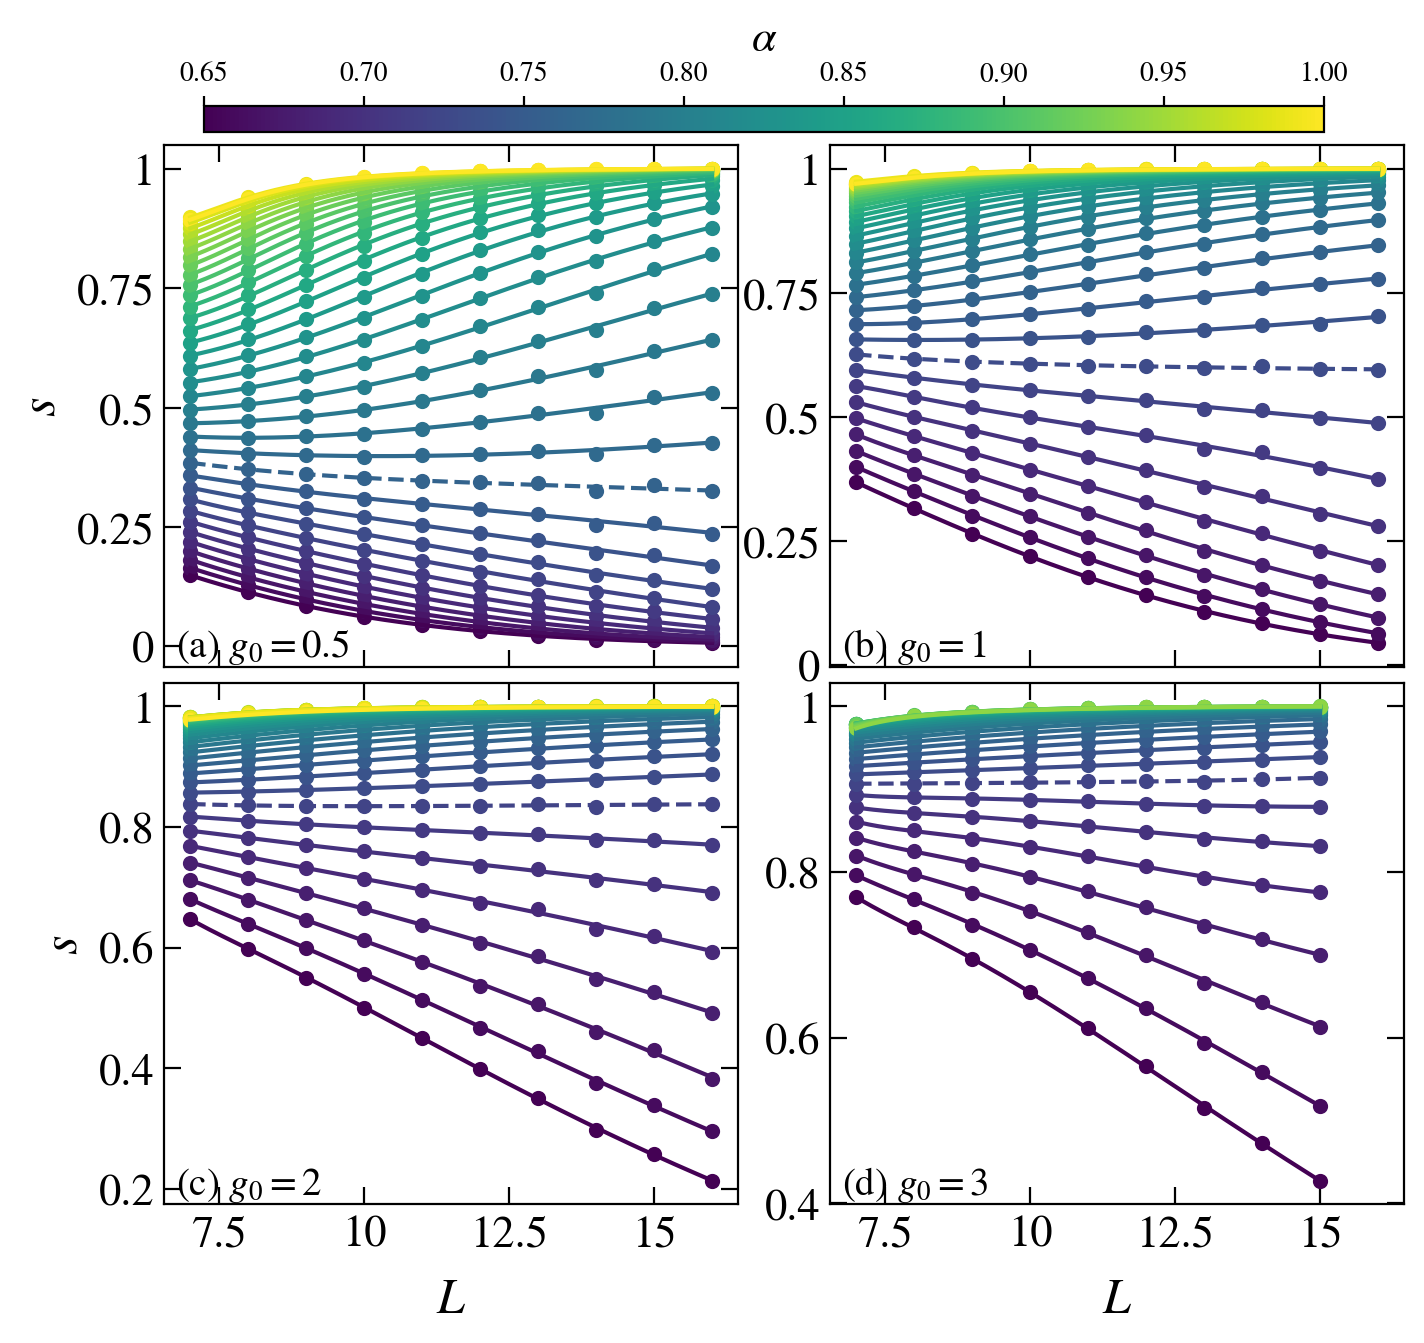

In [72]:
L_total=15
J=0.5
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

alfa_vals = np.linspace(0.65, 1.0, 36)
print(alfa_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(8,6.5), dpi = 200, sharex = True)
axis = axis.flatten()

interpolate = 1
use_fit = 1
bin_size = 5
use_area_collapse = 1
dalfa = 0.06

def envelope_pred(x, nu, s1c):
    return -1/nu * (1 - x) * np.log( s1c * (1 - x) / ( x * (1-s1c) ))
    

def entropy_fit(L, c, eta):
    return c * np.exp(-eta * L)
            
def beta0_fun(x, c_ = 1):
    return -(1 - x) / x * np.log( (1 - x) / c_ )

def pade_fun(x, c0, c1, d0, d1):#, c0, d0):
    return (x**2 + c1 * x + c0) / (x**2 + d1 * x + d0)

def other_fit(x, c0, c1, c2, c3, c4):#, b): 
    return c4 / x**0.5 + c3 / x**3 + c2 / x**2 + c1 / x + c0 # + a / x**4 + b / x**5

def pade_fun_deriv(x, c1, c2, d1, d2):
    return -(x**2 + c1 * x + c2) * (d1 + 2*x) / (x**2 + d1 * x + d2)**2 + (c1 + 2*x) / (d2 + d1*x + x**2)

def other_fit_deriv(x, c1, c2, c3, c4):
    return -3 * c1 / x**4 - 2 * c2 / x**3 - c3 / x**2


p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu
Lstep = 1 if p > 0 else 2

sizes = np.arange(6, 19, 1 if p > 0 else 2)

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"
alfa_min = 0.7

norm = matplotlib.colors.Normalize(
        vmin=np.min(alfa_vals),
        vmax=np.max(alfa_vals))


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

# def other_fit(x, c1, c2, c3, c4, c5):
#     return c1 * (x)**4 + c2 * (x)**3 + c3 * (x)**2 + c4 * (x) + c5
for idx1, J in enumerate([0.5, 1, 2, 3]):
    if J == 0.5:  pars2 = [4.092695889007306, 0.28438454954494563]
    if J == 1.0:  pars2 = [3.656472341847031, 0.08124292114018893]
    if J == 2.0:  pars2 = [2.765914674806553, 0.04100142006507729]
    if J == 3.0:  pars2 = [2.368117374274424, 0.03226345622890216]
    sizes = np.arange(10, 19, Lstep)
    
    alfa_crit = 0.75
    s1_crit = 1
    if J == 0.1:    alfa_crit = 0.8838011380886784; s1_crit = 0.11432584064242023; sizes = np.arange(10, 15, Lstep); nu = 0.66573; s1_min = 0.2; 
    elif J == 0.2:  alfa_crit = 0.8088393000000000; s1_crit = 0.19575772032771582; sizes = np.arange(10, 16, Lstep); nu = 0.63364; s1_min = 0.4; 
    elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.27426435352423423; sizes = np.arange(10, 16, Lstep); nu = 0.61334; s1_min = 0.5; 
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.39861912483317125; sizes = np.arange(10, 20, Lstep); nu = 0.60945; s1_min = 0.6; 
    elif J == 1:    alfa_crit = 0.7294402852322444; s1_crit = 0.63371037671674502; sizes = np.arange(10, 20, Lstep); nu = 0.68639; s1_min = 0.8; 
    elif J == 2:    alfa_crit = 0.720371246397683;  s1_crit = 0.83680062093580853; sizes = np.arange(10, 20, Lstep); nu = 0.79797; s1_min = 0.95;
    elif J == 3:    alfa_crit = 0.7167352842108217; s1_crit = 0.89797378899120622; sizes = np.arange(10, 19, Lstep); nu = 0.80775; s1_min = 0.96;
    else:           alfa_crit = 1/np.sqrt(2)
    
    
    
    alfa_min = alfa_crit + 0.0
    
    interaction = []
    ydata = []
    for L_total in sizes:
        sub_sizes = np.arange(0, L_total+1)
        L = L_total - N
        LA = L_total - p if p > 0 else L_total // 2

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
        else:
            print(name_out)
        entropy = entropy_site[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total-LA)
        interaction.append(alfa_vals)
        ydata.append( entropy )

    # alfa_min = alfa_crit - 0.06

    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.

    ydata = np.transpose( np.array(ydata) )

    idx_c = 0

    envelope_ydata = []
    envelope_xdata = []
    yax_max = -10
    yax_min = 10
    for ii_a, alfa in enumerate(alfa_vals):
        # if alfa < alfa_min: continue
        if alfa == alfa_crit: idx_c = ii_a
        # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
        col = s_m.to_rgba(alfa)

        xx = sizes - N
        yy = ydata[ii_a]
        
        axis[idx1].scatter(xx, yy, color=col, s=20)
        my_fit = pade_fun if alfa > alfa_crit else other_fit
        pars, pconv = fit(my_fit,
                            xdata = xx,
                            ydata = yy,
                            maxfev = 10000
                            )
        xL = np.linspace(xx[0], xx[-1], 10000)
        smooth_data = my_fit(xL, *pars)
        axis[idx1].plot(xL, smooth_data, color=col, ls='--' if np.abs(alfa - alfa_crit) < 0.005 else '-')
    fig_help.set_plot_elements(axis[idx1], xlabel=r"$L$" if idx1 > 1 else "", ylabel=r"$s$" if idx1 % 2 == 0 else "", font_size=16, set_legend=False, xscale='linear', yscale='linear')

# cbar = None

# divider = make_axes_locatable(axis[0])
# cax = divider.new_vertical(size = '4%', pad = 0.05)

# fig.add_axes(cax)
# cbar = fig.colorbar(s_m, cax = cax, orientation = 'horizontal')
# cax.xaxis.set_ticks_position('top')
# cax.xaxis.set_label_position('top')

# cbar.set_label(r"$\alpha$", fontsize=16)
    
fig.subplots_adjust(top=0.94)
cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.02])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
cbar.set_label(r"$\alpha$", fontsize=16)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')

for aa in [axis]:
    for ax in np.array(aa).flatten():
        ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))

axis[0].annotate(r"(a) $g_0=0.5$", fontsize=14, xy=(0.02, 0.02), xycoords='axes fraction')
axis[1].annotate(r"(b) $g_0=1$",   fontsize=14, xy=(0.02, 0.02), xycoords='axes fraction')
axis[2].annotate(r"(c) $g_0=2$",   fontsize=14, xy=(0.02, 0.02), xycoords='axes fraction')
axis[3].annotate(r"(d) $g_0=3$",   fontsize=14, xy=(0.02, 0.02), xycoords='axes fraction')
# axis2[2].annotate(r"(f) $g_0=3.0$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
# axis[3].annotate(r"(d) $g_0=3.0$", fontsize=14, xy=(0.02, 0.94), xycoords='axes fraction')
# axis[0].set_title(r"$N=3, \gamma=%.1f$"%(gamma), fontsize=16)
# axis[1].set_title(r"$N=5, \gamma=%.1f$"%(gamma), fontsize=16)

fig.subplots_adjust(wspace = 0.16, hspace=0.03)
fig.savefig("plots_beta_final/FigS1.pdf", bbox_inches = 'tight', pad_inches=0.02)
# 

## FIGURE S2

0.1 12 s1^c_num =  0.11413422920079448 s1^c_fit =  0.1149214702457995 a =  7.701594209168682 b =  0.3872790566296053
0.2 12 s1^c_num =  0.19575772032771582 s1^c_fit =  0.19903542363240628 a =  4.024231273759971 b =  0.40635652095730446
0.3 12 s1^c_num =  0.2769302142394983 s1^c_fit =  0.27539570993752965 a =  2.631138626766693 b =  0.4158304319717465
0.5 16 s1^c_num =  0.39745462304666845 s1^c_fit =  0.397322670393753 a =  1.5168460662186334 b =  0.4144422721934628
1 16 s1^c_num =  0.5932059265191387 s1^c_fit =  0.63300720652809 a =  0.579760845827945 b =  0.7920689982159252
2 16 s1^c_num =  0.8337905753556596 s1^c_fit =  0.838524171525154 a =  0.19257146538917883 b =  1.2454673358533843
3 15 s1^c_num =  0.9063184653468818 s1^c_fit =  0.8994186951913785 a =  0.11182923520087594 b =  1.3309056579883183


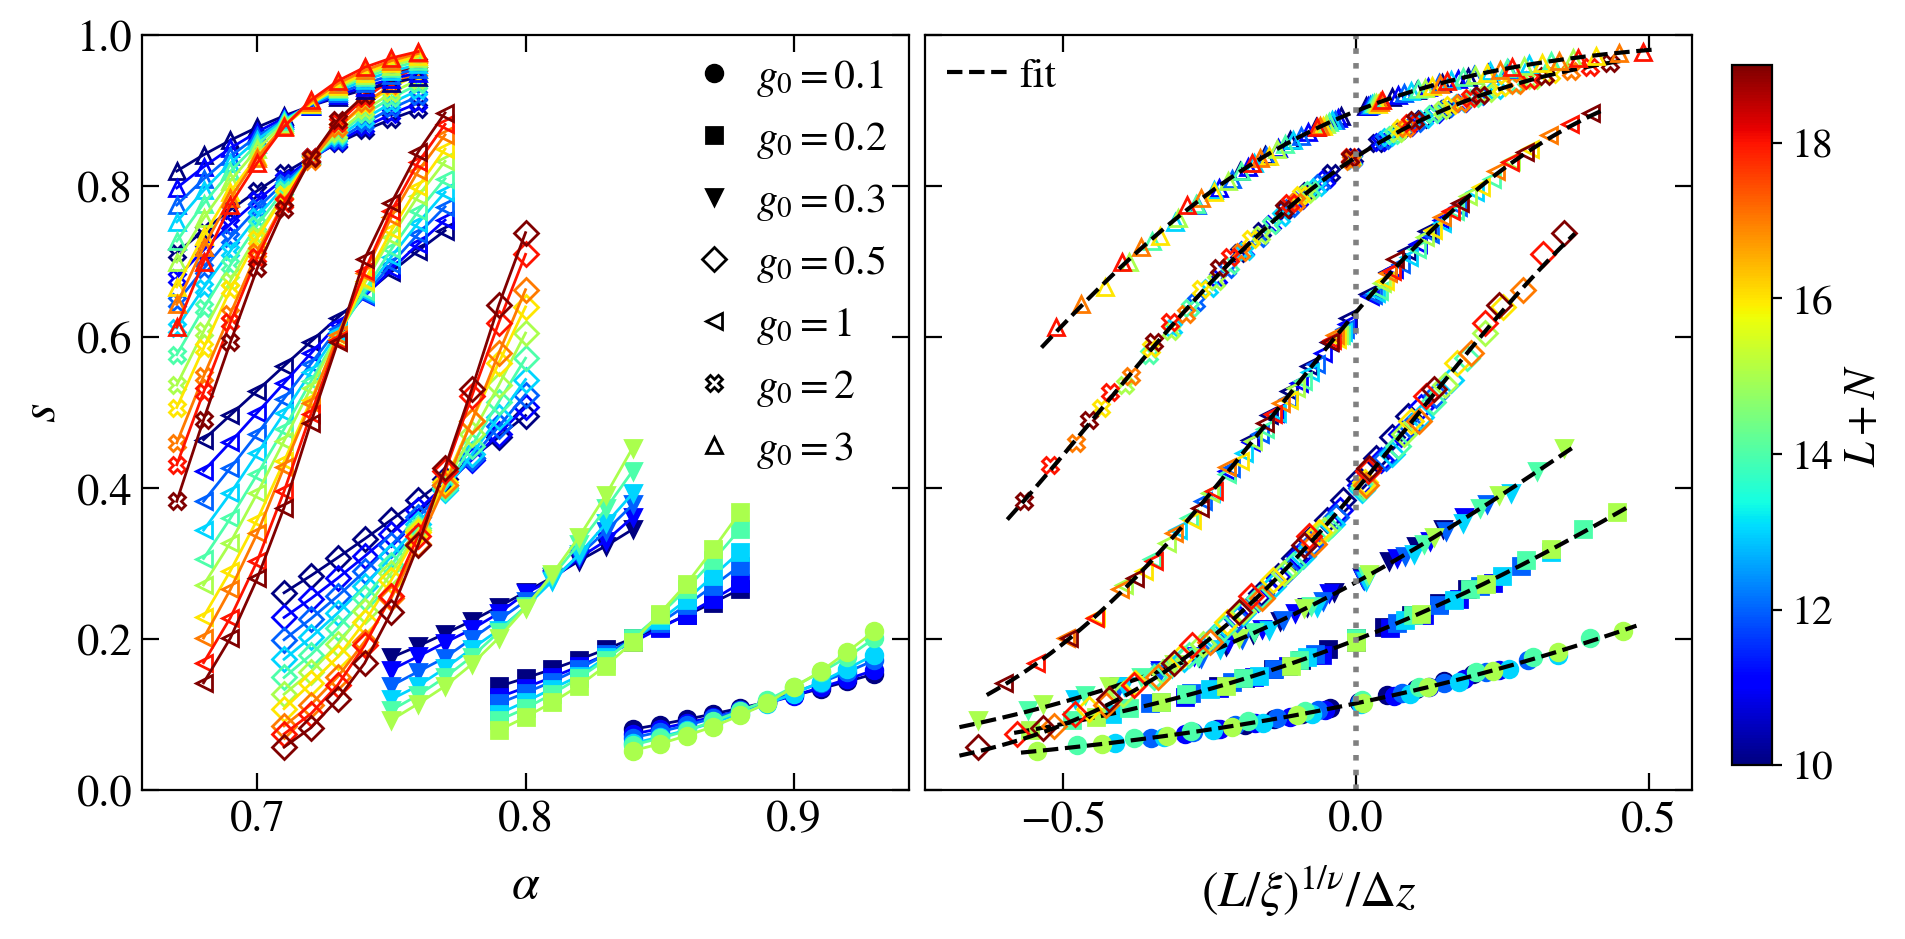

In [33]:

colors_ls = (list(mcolors.TABLEAU_COLORS)[:500])
colors_ls_cyc = itertools.cycle(colors_ls)
markers = itertools.cycle(['o','s','v', 'D', '*', 'X', '^', '<', '+'])

# print(markers)

L_total=15

J=3
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=0
L = L_total - N

scaled_disorder = 0

alfa_vals = np.linspace(0.65, 0.94, 30)

interpolate = 0
delta = 0.05
use_two_parameter_ansatz = 0
use_input_crit_point = 0


USE_PREVIOUS_DATA = 1
ansatz = 'classic'

rescale_fun = cost.resc_functions_dict[ansatz]
critical_fun = cost.crit_functions_dict['const']

nu=500
folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)


p = 1
Lmax = 20

nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

sizes = np.arange(10, Lmax, 1)
norm = matplotlib.colors.Normalize(
    vmin=np.min(sizes),
    vmax=np.max(sizes))


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m.set_array([])

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10, 5), dpi = 200, sharey=True)
# inset = axis.inset_axes([0.55, 0.02, 0.44, 0.5])
axis = [axis[1], axis[0]]

_scs_   = [0.116, 0.199, 0.281, 0.408, 0.605, 0.836, 0.909]
_nuus_  = [0.650, 0.629, 0.616, 0.597, 0.691, 0.790, 0.807]
_alfas_ = [0.889, 0.840, 0.808, 0.768, 0.734, 0.721, 0.716]

for ii_J, J in enumerate([0.1, 0.2, 0.3, 0.5, 1, 2, 3]):
    cross_col = next(colors_ls_cyc)
    mark = markers_ls[ii_J]
    
    axis[1].plot(np.nan, np.nan, marker=mark, lw=0, markersize=6, label=r"$g_0=%g$"%J, color='k', markerfacecolor='None' if J > 0.4 else 'k')
    

    xlab = r"$\alpha$"
    alfa_crit = 0.75
    Lstep = 1 if p > 0 else 2
    if J == 0.1:    alfa_crit = 0.8845176698499674;   s1_crit = 0.116; sizes = np.arange(10, 16, Lstep);
    elif J == 0.2:  alfa_crit = 0.8342560846296337;   s1_crit = 0.199; sizes = np.arange(10, 16, Lstep);
    elif J == 0.3:  alfa_crit = 0.7969816538376154;   s1_crit = 0.281; sizes = np.arange(10, 16, Lstep);
    elif J == 0.5:  alfa_crit = 0.7585106313054992;   s1_crit = 0.407; sizes = np.arange(10, Lmax, Lstep);
    elif J == 1:    alfa_crit = 0.7299645551916056;   s1_crit = 0.605; sizes = np.arange(10, Lmax, Lstep);
    elif J == 2:    alfa_crit = 0.7176543291659800;   s1_crit = 0.835; sizes = np.arange(10, Lmax, Lstep);
    elif J == 3:    alfa_crit = 0.7166694248221162;   s1_crit = 0.909; sizes = np.arange(10, 19, Lstep);
    else:           alfa_crit = 1/np.sqrt(2)
    
    if not USE_PREVIOUS_DATA:
        crit_exponents = []
        crit_alfas = []
        crit_entropy = []
        crit_omega = []
        crit_const = []
        crit_const2 = []
        # for seed in [25346322, 5324, 6342436, 144354, 423452]:
        # for seed in [25346322]:
        for r in range(100):
            seed = np.random.randint(0, int(2**30) )
            # alfa_crit = 1/np.sqrt(2)
            
            interaction = []
            ydata = []
            found_sizes = []
            for L_total in sizes:
                sub_sizes = np.arange(0, L_total+1)
                L = L_total - N
                LA = L_total - p if p > 0 else L_total // 2
                name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

                if exists(name_out):
                    found_sizes.append(L_total) 
                    with h5py.File(name_out, "r") as file:
                        alfa_vals    = np.array(file.get('interaction'))
                        gap_ratio    = np.array(file.get('gap_ratio'))
                        entropy      = np.array(file.get('entropy'))
                        entropy_site = np.array(file.get('single_site_entropy'))
                    S = entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total - LA)
                    indices = np.transpose(np.argwhere(~np.isnan(S)))[0]
                    # print(L_total, indices)
                    interaction.append(alfa_vals[indices])
                    ydata.append(S[indices]) 
                else:
                    print(name_out)
            
            found_sizes = np.array(found_sizes)

            markers = itertools.cycle(markers_ls)
            
            xx_data = []
            yy_data = []
            for ii, L in enumerate(found_sizes - N):
                col = s_m.to_rgba(L + N)
                
                indices = np.where(np.logical_and(interaction[ii] >= np.round(alfa_crit - delta, 3), interaction[ii] < np.round(alfa_crit + delta, 3)))[0]
                xx = interaction[ii][indices]
                yy = ydata[ii][indices]
                
                if interpolate:
                    entropy_spl = make_spline(xx, yy)
                    xx  = np.linspace(xx[0], xx[-1], 20)
                    yy = entropy_spl(xx)
                
                
                xx_data.append(xx)    
                yy_data.append(yy)
            # crit_exp, crit_pars, costfun, status = cost.get_crit_points(x=np.array(xx_data), y=np.array(yy_data), vals=found_sizes - N, crit_fun='free', scaling_ansatz='classic', seed=2849423424, two_parameter_ansatz=False, use_input_criticals=use_input_crit_point, _crit_in=[alfa_crit])
            # print(J, crit_pars, crit_exp)
            if use_two_parameter_ansatz:
                [crit_exp, omega, const], crit_pars, costfun, status = cost.get_crit_points(x=np.array(xx_data), y=np.array(yy_data), vals=found_sizes - N, crit_fun='const', scaling_ansatz=ansatz, seed=seed, two_parameter_ansatz=True, use_input_criticals=use_input_crit_point, _crit_in=[alfa_crit])
                print("\n\ng0=", J, "\nalfa_c=", alfa_crit, "\nnu=", crit_exp, "\nc=", const, "\nomega=", omega, "\nalfa*=", crit_pars, "\nCF=", costfun, "\nstatus=", status) 
                crit_omega.append(omega)
                crit_const.append(const)
            else:
                [crit_exp], crit_pars, costfun, status = cost.get_crit_points(x=np.array(xx_data), y=np.array(yy_data), vals=found_sizes - N, crit_fun='const', scaling_ansatz=ansatz, seed=seed, two_parameter_ansatz=False, use_input_criticals=use_input_crit_point, _crit_in=[alfa_crit])
                print("\n\ng0=", J, "\nalfa_c=", alfa_crit, "\nnu=", crit_exp, "\nalfa*=", crit_pars, "\nCF=", costfun, "\nstatus=", status) 
            crit_exponents.append(crit_exp)
            if ansatz == 'RGcorr':
                crit_const2.append(crit_pars[0])
                crit_alfas.append(crit_pars[1])
            else:
                crit_alfas.append(crit_pars[0])
            for ii, L in enumerate(found_sizes - N):
                xdats = rescale_fun(xx_data[ii], (found_sizes - N), ii, critical_fun, crit_exp, crit_pars[0], crit_pars[1:])\
                        if ansatz == 'RGcorr' else rescale_fun(xx_data[ii], (found_sizes - N), ii, critical_fun, crit_exp, crit_pars)
                # xdats /= (found_sizes[-1] - N)**((crit_exp))
                
                ydats = None
                if use_two_parameter_ansatz:
                    ydats = yy_data[ii] - const * L**(-omega)
                else:
                    ydats = yy_data[ii]
                permut = np.argsort(xdats)
                idx = np.argmin(np.abs(xdats))
                s1_crit = yy_data[ii][idx]
                # if yy_data[ii][idx] < s1_crit: s1_crit = yy_data[ii][idx]
            
                crit_entropy.append(s1_crit)
            alfa_crit_found = crit_pars[0]
            
        print("----------------------------g0 = ", J)
        print("nu = ", 1/np.array(crit_exponents))
        print("alfa_c = ", crit_alfas)
        print("s1^c = ", crit_entropy)
        print("omega = ", crit_omega)
        print("const = ", crit_const)
        print("const2 = ", crit_const2)
        print("\alpha_c = ", tools.typical(crit_alfas), "s_c = ", tools.typical(crit_entropy), "nu = ", 1/tools.typical(crit_exponents))
        print("std(alpha_c) = ", np.std(crit_alfas), "std(s_c) = ", np.std(crit_entropy), "std(nu) = ", np.std(crit_exponents))
        print("ds_c- = ", tools.typical(crit_entropy) - np.min(crit_entropy), "ds_c+ = ", -tools.typical(crit_entropy) + np.max(crit_entropy))
        
        xfit = 1 / (found_sizes - N)
        
        s1_crit = 10
        crit_exp = tools.typical(crit_exponents)
        omega = tools.typical(crit_omega)
        const = np.mean(np.array(crit_const))
        const2 = np.mean(np.array(crit_const2))
        print("w/2 + 1/v = ", omega / 2 + crit_exp)
        alpha_c = tools.typical(crit_alfas)
    else:
        crit_exp = 1 / _nuus_[ii_J]
        alpha_c  = _alfas_[ii_J]
        omega    = 0
        const    = 0
        const2   = 0
        found_sizes = []
        interaction = []
        ydata = []
        for L_total in sizes:
            sub_sizes = np.arange(0, L_total+1)
            L = L_total - N
            LA = L_total - p if p > 0 else L_total // 2
            name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

            if exists(name_out):
                found_sizes.append(L_total) 
                with h5py.File(name_out, "r") as file:
                    alfa_vals    = np.array(file.get('interaction'))
                    entropy      = np.array(file.get('entropy'))
                S = entropy[LA] / (p*np.log(2)) if p > 0 else entropy[LA] / page(LA, L_total - LA)
                indices = np.transpose(np.argwhere(~np.isnan(S)))[0]
                interaction.append(alfa_vals[indices])
                ydata.append(S[indices]) 
            else:
                print(name_out)
        
        found_sizes = np.array(found_sizes)

        xx_data = []
        yy_data = []
        for ii, L in enumerate(found_sizes - N):
            col = s_m.to_rgba(L + N)
            
            indices = np.where(np.logical_and(interaction[ii] >= np.round(alfa_crit - delta, 3), interaction[ii] < np.round(alfa_crit + delta, 3)))[0]
            xx = interaction[ii][indices]
            yy = ydata[ii][indices]
            
            if interpolate:
                entropy_spl = make_spline(xx, yy)
                xx  = np.linspace(xx[0], xx[-1], 20)
                yy = entropy_spl(xx)
            
            
            xx_data.append(xx)    
            yy_data.append(yy)
    xxful = []
    yyful = []
    for ii, L in enumerate(found_sizes - N):
        xdats = rescale_fun(xx_data[ii], (found_sizes - N), ii, critical_fun, crit_exp, const2, alpha_c)\
                if ansatz == 'RGcorr' else rescale_fun(xx_data[ii], (found_sizes - N), ii, critical_fun, crit_exp, alpha_c)
        # xdats /= (found_sizes[-1] - N)**((crit_exp))
        
        ydats = None
        if use_two_parameter_ansatz:
            ydats = yy_data[ii] - const * L**(-omega)
        else:
            ydats = yy_data[ii]
        
        xxful.append(xdats)
        yyful.append(ydats)
        permut = np.argsort(xdats)
        idx = np.argmin(np.abs(xdats))
        # s1_crit += yy_data[ii][idx]
        if yy_data[ii][idx] < s1_crit: s1_crit = yy_data[ii][idx]
        
    xmin = min(xdats.flatten())
    xmax = max(xdats.flatten())
    for ii, L in enumerate(found_sizes - N):
        col = s_m.to_rgba(L + N)
        axis[0].plot((xxful[ii]) / (xmax - xmin), yyful[ii], marker=mark, lw=0, markersize=6, color=col, markerfacecolor='None' if J > 0.4 else col) #, label=r"$L=%d$"%L)
        axis[1].plot(xx_data[ii], yy_data[ii],               marker=mark, lw=1, markersize=6, color=col, markerfacecolor='None' if J > 0.4 else col) #, label=r"$L=%d$"%L)
        
    xxful = np.array(xxful).flatten()
    yyful = np.array(yyful).flatten()
    
    crit_exp = 1/crit_exp
    
    def ansatz_fun(x, a, b):
        # a = 1/s1_crit - 1
        # return a + b * np.tanh(c*x)
        # return sc + (1 - 1 / ( (x / 0.01)**2 + 1)) / (1 + np.exp(-b * x))
        return 1 / (1 + a * np.exp(-b * x) )
    
    pars, pconv= fit(ansatz_fun,
                    xdata = xxful,
                    ydata = yyful,
                    maxfev = 20000)
    z = np.linspace(1.05 * min(xxful), 1.05*max(xxful), 1000)
    # axis[0].plot((z)/ (xmax - xmin), ansatz_fun(z, *pars), lw=1.5, color='k', ls = '--', label=r"$\frac{1}{1+ae^{-bL^{1/\nu}(\alpha-\alpha_c)}}$" if J==0.5 else '')
    axis[0].plot((z)/ (xmax - xmin), ansatz_fun(z, *pars), lw=1.5, color='k', ls = '--', label=r"fit" if J==0.5 else '') #Eq. (S34)
    
    # axis.plot(z, ansatz(z, *pars), lw=1.5, color='k', ls = '--')
    print(J, L, "s1^c_num = ", s1_crit, "s1^c_fit = ", 1/(1+pars[0]), "a = ", pars[0], "b = ", pars[1])#, "shift = ", pars[2])
    # crit_entropy.append(s1_crit)
            

axis[0].axvline(x=0, lw=2, ls=':', c='gray')


ylab = r"$\bar{s}_{1}-c\cdot L^{-\omega}$" if use_two_parameter_ansatz else r"$s$"
# xlab = r"$%s/\Delta z$"%cost.scale_ansatz_label[ansatz]('\\alpha')
xlab = r"$(L/\xi)^{1/\nu}/\Delta z$"

fig_help.set_plot_elements(axis[0], ylabel='', xlabel=xlab, font_size=16, set_legend=False, xscale='linear')
fig_help.set_legend(axis[0], fontsize=15, loc='upper left')
 
fig_help.set_plot_elements(axis[1], ylabel=ylab, xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear')
fig_help.set_legend(axis[1], fontsize=15, loc='upper right')

if not use_two_parameter_ansatz: axis[0].set_ylim(0, 1)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$L+N$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

fig.subplots_adjust(wspace = 0.02, hspace=0.25)


# axis[0].annotate(r"(a) $g_0=0.5$", fontsize=18, xy=(0.55, 0.07), xycoords='axes fraction')
# axis[1].annotate(r"(b) $g_0=1.0$", fontsize=18, xy=(0.55, 0.07), xycoords='axes fraction')
# axis[2].annotate(r"(c) $g_0=2.0$", fontsize=18, xy=(0.55, 0.07), xycoords='axes fraction')
# axis[3].annotate(r"(d)", fontsize=18, xy=(0.85, 0.07), xycoords='axes fraction')

fig.savefig("plots_beta_final/FigS2.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig.savefig("plots_beta/FigA1.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig3.savefig("plots_beta/Fig_collapsed.pdf", bbox_inches = 'tight', pad_inches=0.02)

## FIGURE S3

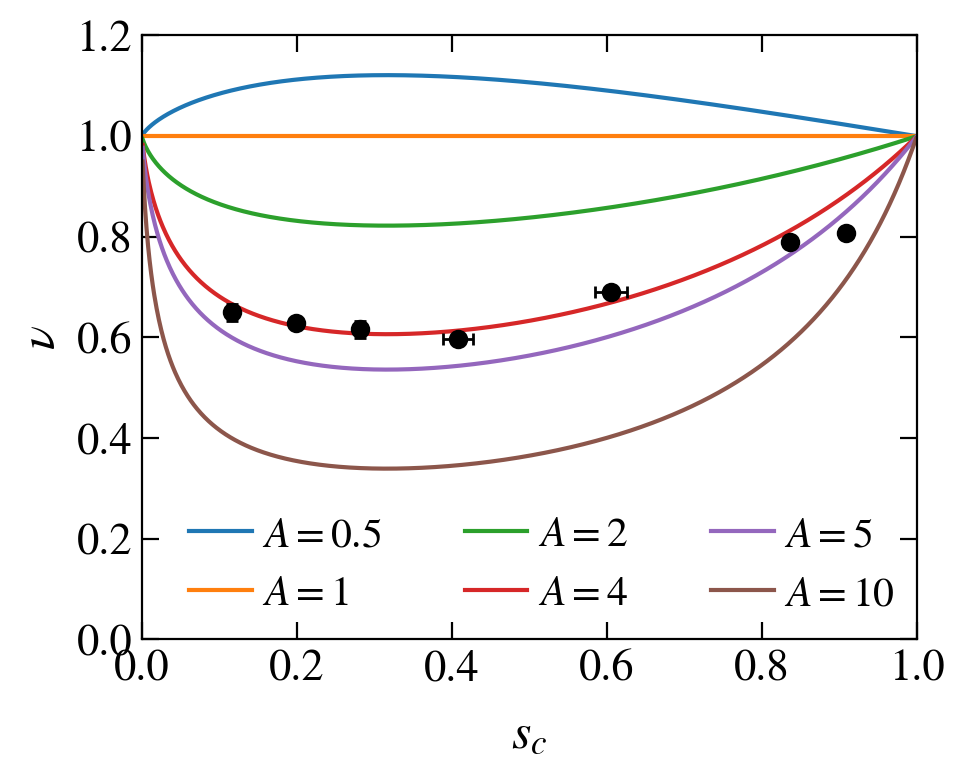

In [52]:
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5, 4), dpi = 200, sharey=True)

sc = np.linspace(0, 1, 1000)
def v_guess(_sc):
    return 1 / (1 + (1-A) * _sc * (1 - _sc + np.log(_sc)) / (1 - _sc))

xdata = [0.116, 0.199, 0.281, 0.408, 0.605, 0.836, 0.909]
ydata = [0.650, 0.629, 0.616, 0.597, 0.691, 0.790, 0.807]
xerr  = [0.00275, 0.00310, 0.00522, 0.01936, 0.02037, 0.00261, 0.00489]
yerr  = [0.01707, 0.00545, 0.01634, 0.00301, 0.00325, 0.00328, 0.01037]
for A in [0.5, 1, 2, 4, 5, 10]:
    axis.plot(sc, v_guess(sc), label = "$A=%g$"%A)
    
axis.errorbar(x=xdata, y=ydata, xerr=xerr, yerr=yerr, marker='o', color='k', lw = 0, capsize=2, elinewidth = 1)

fig_help.set_plot_elements(axis, ylabel=r"$\nu$", xlabel=r"$s_c$", font_size=16, set_legend=False, xlim=(0,1), ylim=(0,1.2))
fig_help.set_legend(axis, fontsize=15, loc='lower right', ncol=3)
fig.savefig("plots_beta_final/FigS3.pdf", bbox_inches = 'tight', pad_inches=0.02)

## FIGURE S4

12


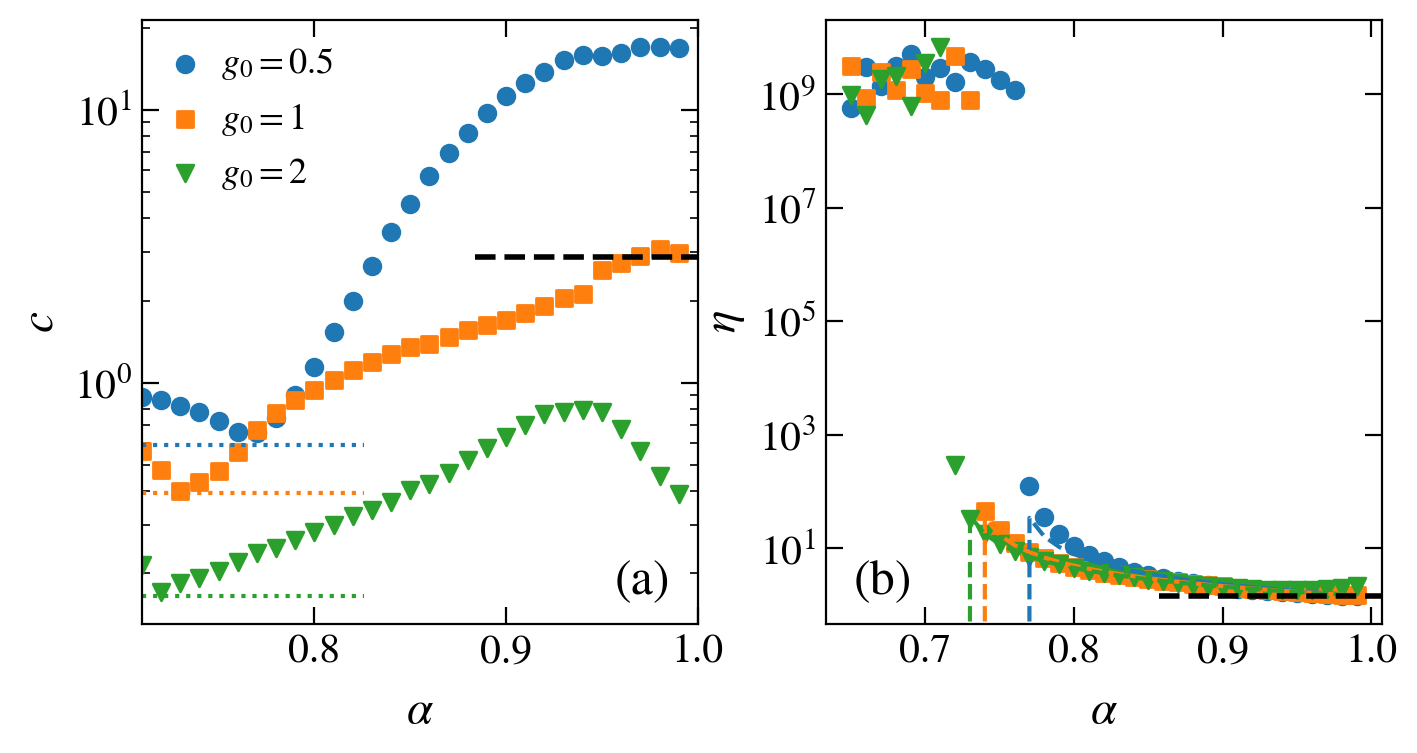

In [27]:
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)
markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

L_total=15

J=2


alfa=1
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0


fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(8,4), dpi = 200)

sizes = np.arange(6, 17, 1)

interpolate = 0

alfa_min = 0.71
alfa_max = 0.99
p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
xlab = r"$L$"

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.

norm = matplotlib.colors.Normalize(
        vmin=alfa_min,
        vmax=alfa_max)

# choose a colormap
# c_m = matplotlib.cm.cool

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

def eta_fit(alfa, alfac):
    return 1/np.log(2) / (1 - np.log(alfa) / np.log(alfac))

def entropy_fit(L, c, eta):
    return c * np.exp(-L / eta)
            
            
for idx1, J in enumerate([0.5, 1, 2]):
    mar = next(markers)
    colo = next(colors_ls_cyc)
    
    alfa_crit = 0.75
    if J == 0.1:    alfa_crit = 0.8845176698499674; s1_crit = 0.116;  sizes = np.arange(8, 16, 1);
    elif J == 0.2:  alfa_crit = 0.8342560846296337; s1_crit = 0.199;  sizes = np.arange(8, 16, 1);
    elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.281;  sizes = np.arange(8, 16, 1);
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.407; s1_min = 0.6;  sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.59720
    elif J == 1:    alfa_crit = 0.7304402852322444; s1_crit = 0.605; s1_min = 0.83; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.69137
    elif J == 2:    alfa_crit = 0.7207704442893257; s1_crit = 0.835; s1_min = 0.92; sizes = np.arange(10, 20, 1 if p > 0 else 2); nu = 0.78930
    elif J == 3:    alfa_crit = 0.71795404;         s1_crit = 0.909; s1_min = 0.6;  sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.80702
    else:           alfa_crit = 1/np.sqrt(2)
    
    interaction = []
    ydata = []
    for L_total in sizes:
        L = L_total - N
        LA = L_total - p

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
                Sinfo_vN     = np.array(file.get('vN info entropy'))
        else:
            print(name_out)
        alfa_vals_original = alfa_vals
        # print(L_total, entropy.shape)
        # entropy = 1 - entropy_site[LA] / ( np.log(2) )#page(LA, L_total-LA)
        entropy = 1 - entropy[LA] / ( p*np.log(2) )#page(LA, L_total-LA)
        interaction.append(alfa_vals)
        ydata.append(entropy)
        
    ydata = np.transpose( np.array(ydata) )
    # print(ydata.shape)
    beta_0 = np.zeros( (alfa_vals.size) )
    new_xx = np.zeros( (alfa_vals.size) )
    
    alfa_plot = []
    prefactor = []
    prefactor2 = []
    eta = []
    eta2 = []
    for ii_a, alfa in enumerate(alfa_vals):
        if alfa < alfa_crit - 0.2 or alfa > alfa_max: continue

        col = s_m.to_rgba(alfa)
        xx = (sizes - N)#**1/nu
        yy = ydata[ii_a]
        # print(xx[2], xx[ii_cut])
        try:
            pars, pconv= fit(entropy_fit,
                            xdata = xx,
                            ydata = yy)
            prefactor.append(pars[0])
            eta.append(pars[1])
            
            ii_cut = -7
            pars, pconv= fit(entropy_fit,
                            xdata = xx[ii_cut:],
                            ydata = yy[ii_cut:])
            prefactor2.append(pars[0])
            eta2.append(pars[1])
            alfa_plot.append(alfa)
            
            # if J == 0.5 and alfa > 0.8:
            #     axis[1].scatter(xx, yy, color=col)
            #     dense_sizes = np.linspace(0*xx[ii_cut], xx[-1], 1000)
            #     axis[1].plot(dense_sizes, entropy_fit(dense_sizes, *pars), color=col, ls='--')
                
            
        except RuntimeError:
            print(alfa)
            
            
        # if np.abs(alfa - 0.94) < 0.001:
        #     c_L0 = []
        #     for ii_cut in range(0, xx.size-3, 1):
        #         pars, pconv= fit(entropy_fit,
        #                     xdata = xx[ii_cut:],
        #                     ydata = yy[ii_cut:])
        #         c_L0.append(pars[0])
        #     axis[1].scatter(xx[:-3], c_L0, color=colo, marker=mar)
    
    alfa_plot = np.array(alfa_plot)
    eta = np.array(eta)
    eta2 = np.array(eta2)
    # axis[0].scatter(alfa_plot, (prefactor), marker=mar, color=colo, facecolor='None')
    axis[0].scatter(alfa_plot, (prefactor2), marker=mar, color=colo, label=r"$g_0=%g$"%J)
    axis[0].axhline(y=1-s1_crit, ls=':', color=colo, xmax = 0.4)
    # axis[1].scatter(alfa_plot, (eta), marker=mar, color=colo, facecolor='None')
    axis[1].scatter(alfa_plot, (eta2), marker=mar, color=colo, label=r"$g_0=%g$"%J)
    
    parso, pconv= fit(eta_fit,
                            xdata = alfa_plot[alfa_plot < 0.9],
                            ydata = eta[alfa_plot < 0.9], 
                            maxfev = 10000)
    x = np.linspace(alfa_crit, max(alfa_plot), 1000)
    axis[1].plot(alfa_plot, eta_fit(alfa_plot, alfa_crit), color=colo, ls='--')
    
axis[0].axhline(y=2/np.log(2), ls='--', color='k', xmin = 0.6, lw=2)
axis[1].axhline(y=1/np.log(2), ls='--', color='k', xmin = 0.6, lw=2)

print(sizes[-8])
fig_help.set_plot_elements(axis[0], ylabel=r"${c}$", xlabel=r"$\alpha$", font_size=15, set_legend=False, xscale='linear', yscale='log', xlim=(0.71, 1.0))
fig_help.set_plot_elements(axis[1], ylabel=r"$\eta$", xlabel=r"$\alpha$", font_size=15, set_legend=False, xscale='linear', yscale='log')
fig_help.set_legend(axis[0], loc = 'upper left', fontsize=13, anchor=(-0.03, 1.01))

axis[0].annotate(r"(a)", fontsize=18, xy=(0.85, 0.05), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=18, xy=(0.05, 0.05), xycoords='axes fraction')



fig.subplots_adjust(wspace = 0.23, hspace=0.05)
fig.savefig("plots_beta_final/FigS4.pdf", bbox_inches = 'tight', pad_inches=0.02)

# c vs alfa, closed fit all L, open fit L+N>14

In [407]:
28 * 100 * 6

16800

11


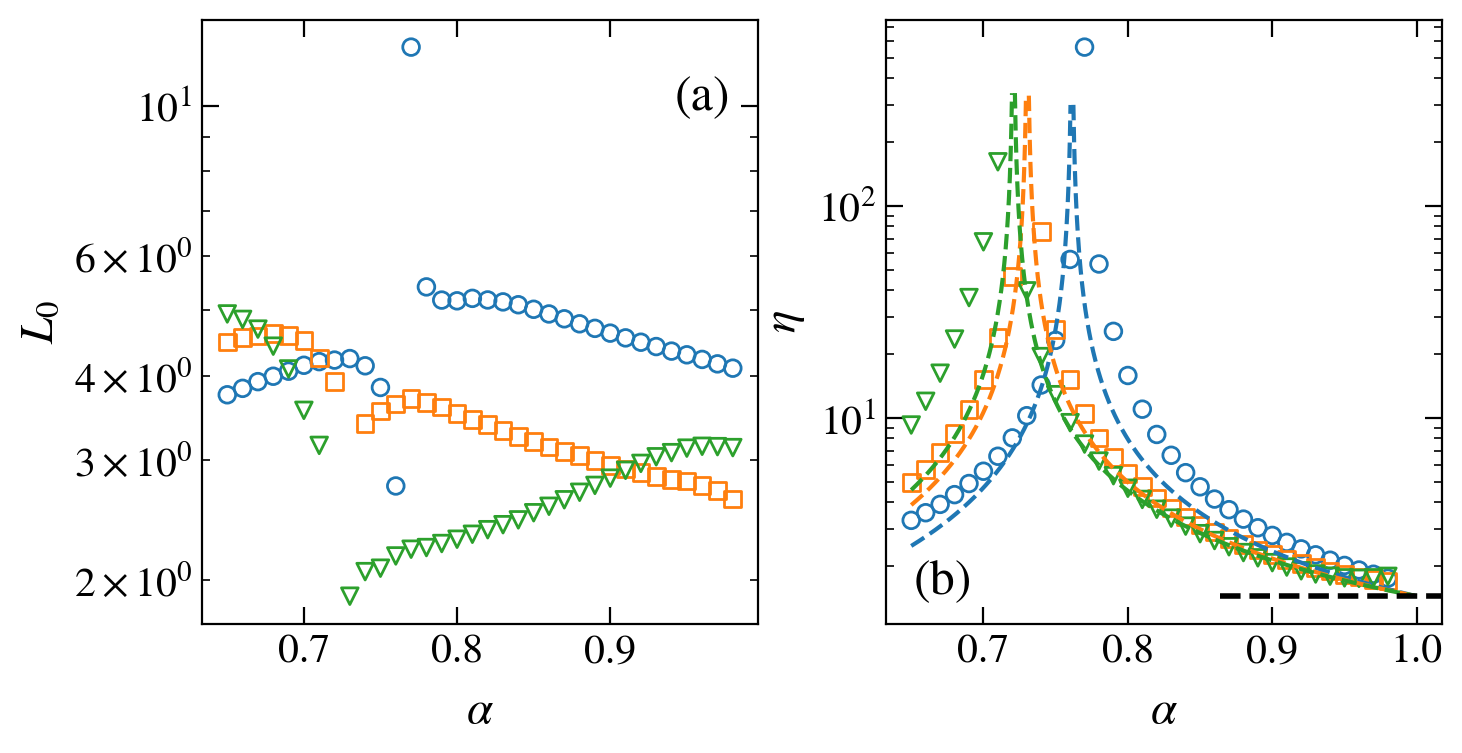

In [26]:
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)
markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

L_total=15

J=2


alfa=1
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0


fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(8,4), dpi = 200)

sizes = np.arange(6, 17, 1)

interpolate = 0

alfa_min = 0.1
alfa_max = 0.98
p = 1       # number of last spins
nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

folder_base = f'./collected data_scaled disorder/' if scaled_disorder else f'./collected data/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
xlab = r"$L$"

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.

norm = matplotlib.colors.Normalize(
        vmin=alfa_min,
        vmax=alfa_max)

# choose a colormap
# c_m = matplotlib.cm.cool

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

def eta_fit(alfa, alfac):
    return 1/np.log(2) / np.abs(1 - np.log(alfa) / np.log(alfac))

            
            
for idx1, J in enumerate([0.5, 1, 2]):
    mar = next(markers)
    colo = next(colors_ls_cyc)
    
    alfa_crit = 0.75
    if J == 0.1:    alfa_crit = 0.8845176698499674; s1_crit = 0.116;  sizes = np.arange(8, 16, 1);
    elif J == 0.2:  alfa_crit = 0.8342560846296337; s1_crit = 0.199;  sizes = np.arange(8, 16, 1);
    elif J == 0.3:  alfa_crit = 0.7969816538376154; s1_crit = 0.281;  sizes = np.arange(8, 16, 1);
    elif J == 0.5:  alfa_crit = 0.7612779024078085; s1_crit = 0.407; s1_min = 0.6;  sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.59720
    elif J == 1:    alfa_crit = 0.7304402852322444; s1_crit = 0.632; s1_min = 0.83; sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.69137
    elif J == 2:    alfa_crit = 0.7207704442893257; s1_crit = 0.835; s1_min = 0.92; sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.78930
    elif J == 3:    alfa_crit = 0.71795404;         s1_crit = 0.909; s1_min = 0.6;  sizes = np.arange(10, 19, 1 if p > 0 else 2); nu = 0.80702
    else:           alfa_crit = 1/np.sqrt(2)
    
    def _fit1(L, L0, eta):
        return 1 - (1 - s1_crit) * np.exp(-(L - L0) / eta)

    def _fit2(L, L0, xi):
        return (s1_crit) * np.exp(-(L - L0) / xi)

    
    interaction = []
    ydata = []
    for L_total in sizes:
        L = L_total - N
        LA = L_total - p

        name_out = folder + "_L=%g,N=%g,J=%g,gamma=%g,w=%g.hdf5"%(L, N, J, gamma, w)

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                alfa_vals    = np.array(file.get('interaction'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                _entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
                Sinfo_vN     = np.array(file.get('vN info entropy'))
        else:
            print(name_out)
        alfa_vals_original = alfa_vals
        # print(L_total, entropy.shape)
        # entropy = 1 - entropy_site[LA] / ( np.log(2) )#page(LA, L_total-LA)
        entropy = _entropy[LA] / ( p*np.log(2) )
        interaction.append(alfa_vals)
        ydata.append(entropy)
        
    ydata = np.transpose( np.array(ydata) )
    # print(ydata.shape)
    beta_0 = np.zeros( (alfa_vals.size) )
    new_xx = np.zeros( (alfa_vals.size) )
    
    alfa_plot = []
    prefactor = []
    prefactor2 = []
    eta = []
    eta2 = []
    for ii_a, alfa in enumerate(alfa_vals):
        if np.abs(alfa - alfa_crit) <= 0.001: continue
        if alfa > alfa_max: continue

        _entropy_fit = _fit1 if alfa >= alfa_crit else _fit2
        
        col = s_m.to_rgba(alfa)
        xx = (sizes - N)#**1/nu
        yy = ydata[ii_a]
        # print(xx[2], xx[ii_cut])
        try:
            ii_cut = -7
            pars, pconv= fit(_entropy_fit,
                            xdata = xx[ii_cut:],
                            ydata = yy[ii_cut:])
            prefactor2.append(pars[0])
            eta2.append(pars[1])
            alfa_plot.append(alfa)
            
            pars, pconv= fit(_entropy_fit,
                            xdata = xx,
                            ydata = yy)
            prefactor.append(pars[0])
            eta.append(pars[1])
            
            # if J == 0.5 and alfa > 0.8:
            #     axis[1].scatter(xx, yy, color=col)
            #     dense_sizes = np.linspace(0*xx[ii_cut], xx[-1], 1000)
            #     axis[1].plot(dense_sizes, entropy_fit(dense_sizes, *pars), color=col, ls='--')
                
            
        except RuntimeError:
            print(alfa)
            
            
        # if np.abs(alfa - 0.94) < 0.001:
        #     c_L0 = []
        #     for ii_cut in range(0, xx.size-3, 1):
        #         pars, pconv= fit(entropy_fit,
        #                     xdata = xx[ii_cut:],
        #                     ydata = yy[ii_cut:])
        #         c_L0.append(pars[0])
        #     axis[1].scatter(xx[:-3], c_L0, color=colo, marker=mar)
    
    alfa_plot = np.array(alfa_plot)
    eta = np.array(eta)
    eta2 = np.array(eta2)
    axis[0].scatter(alfa_plot, (prefactor), marker=mar, color=colo, facecolor='None')
    # axis[0].scatter(alfa_plot, (prefactor2), marker=mar, color=colo, label=r"$g_0=%g$"%J)
    # axis[0].axhline(y=1-s1_crit, ls=':', color=colo, xmax = 0.4)
    axis[1].scatter(alfa_plot, (eta), marker=mar, color=colo, facecolor='None')
    # axis[1].scatter(alfa_plot, (eta2), marker=mar, color=colo, label=r"$g_0=%g$"%J)
    
    parso, pconv= fit(eta_fit,
                            xdata = alfa_plot[alfa_plot < 0.9],
                            ydata = eta[alfa_plot < 0.9], 
                            maxfev = 10000)
    x = np.linspace(0.65, alfa_crit - 0.001, 1000)
    axis[1].plot(x, eta_fit(x, alfa_crit), color=colo, ls='--')
    x = np.linspace(alfa_crit + 0.001, 1, 1000)
    axis[1].plot(x, eta_fit(x, alfa_crit), color=colo, ls='--')
    
# axis[0].axhline(y=2/np.log(2), ls='--', color='k', xmin = 0.6, lw=2)
axis[1].axhline(y=1/np.log(2), ls='--', color='k', xmin = 0.6, lw=2)

print(sizes[-8])
fig_help.set_plot_elements(axis[0], ylabel=r"$L_0$", xlabel=r"$\alpha$", font_size=15, set_legend=False, xscale='linear', yscale='log')#, xlim=(0.71, 1.0))
fig_help.set_plot_elements(axis[1], ylabel=r"$\eta$", xlabel=r"$\alpha$", font_size=15, set_legend=False, xscale='linear', yscale='log')
# fig_help.set_legend(axis[0], loc = 'upper left', fontsize=13)

axis[0].annotate(r"(a)", fontsize=18, xy=(0.85, 0.85), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=18, xy=(0.05, 0.05), xycoords='axes fraction')



fig.subplots_adjust(wspace = 0.23, hspace=0.05)
# fig.savefig("plots_beta_final/FigS4.pdf", bbox_inches = 'tight', pad_inches=0.02)

# c vs alfa, closed fit all L, open fit L+N>14